### Рассмотрели 4 гипотезы:
1. Если команда играет на домашнем поле, то она побеждает в большей части случаев.

2. Если команда чаще всего выигрывала с большим разрывом в счете, то у неё больше вероятности одерживать победу и в других матчах.

3. Если в команде играют топовые игроки, то такая команда побеждает чаще.

4. Если у команды высокие показатели, много побед за разные сезоны (от сезона к сезону), то такая команда чаще одерживает победу.

### Выводы:

##### Гипотеза № 1:

Игра на домашнем поле существенно повышает вероятность победы команды. При этом не выявлена корреляция победы ни с абсолютными тактическими характеристиками команды, ни с их разрывом у играющих команд.


##### Гипотеза № 2:

Средний разрыв в счете, с которым команда заканчивает игру, имеет очень сильную корреляцию с количеством побед (0.89)
Чем больше разрыв в счете имела команда в среднем в предыдущих играх, тем с бОльшей вероятностью она одержит победу.


##### Гипотеза № 3:

Видим совсем небольшую корреляцию между показателями участия топовых игроков в матче и победой той команды, в которой они присутствовали - 0.4. Если в домашней команде присутствовали топовые игроки, то и победа этих команд более вероятна, и наоборот. Если топовых игроков не было ни в одной команде, то возможны были совершенно разные исходы матча.
При расширении списка топовых игроков такая корреляция становится меньше, что логично, ведь мы таким образом уменьшаем критерий "топовости".


##### Гипотеза № 4:

Выявлена небольшая связь победы команды и ее тактики в игре. На победу в матче сильнее всего влияют следующие показатели: активное нападение на игроков другой команды, владеющих мячом (прессинг в обороне), уровень передач в атаке, расположение команды на поле - чем свободнее команда расположена при создании голевых моментов, тем чаще она одерживает победу.
Учет данных показателей может быть преимуществом при определение победителя матча.


In [1]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pltly

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

C:\Users\vikto\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('CL-DA-Project3-1.csv')
players = pd.read_csv("players.csv")

In [3]:
df.head(5)

id     season  stage  date             league_name match_result  \
0  377  2009/2010     19  2010  Belgium Jupiler League     home win   
1  379  2009/2010     19  2010  Belgium Jupiler League     away win   
2  382  2009/2010     19  2010  Belgium Jupiler League     home win   
3  405  2009/2010     22  2010  Belgium Jupiler League     home win   
4  406  2009/2010     22  2010  Belgium Jupiler League     away win   

   home_team_goal home_team_name  away_team_goal away_team_name  ...  \
0               3            AND               2            CLB  ...   
1               2            CHA               3            STL  ...   
2               1            MEC               0            BAC  ...   
3               2            CLB               1            WES  ...   
4               0            STL               4            AND  ...   

   away_player_2  away_player_3  away_player_4  away_player_5  away_player_6  \
0        36832.0        21812.0        38336.0        39578.0        37979.0   
1        39580.0        47411.0        35412.0       159888.0        39631.0   
2        37988.0        36849.0        38322.0        38380.0        38800.0   
3        43049.0        37953.0        38339.0            NaN        38343.0   
4        38388.0        38389.0        38253.0        69713.0        33620.0   

   away_player_7  away_player_8  away_player_9  away_player_10  away_player_11  
0        11736.0        42594.0        38366.0        163670.0         75405.0  
1        39591.0       148335.0       156551.0         25957.0         38369.0  
2        38784.0        38786.0       166676.0         41106.0         33622.0  
3        21834.0        38778.0       182605.0         37025.0         50160.0  
4        38378.0        38383.0        38393.0        148302.0        181276.0  

[5 rows x 58 columns]

# Гипотеза №1
## Если команда играет на домашнем поле, то она побеждает в большей части случаев.

Предобработка данных

In [4]:
df.drop(columns=['home_buildUpPlayDribbling', 'away_buildUpPlayDribbling'], inplace=True)

In [5]:
# Заменяем значения в столбце match_result и создаем новый столбец для результатов home и away
df['home_result'] = df['match_result'].replace({'home win': 2, 'away win': 0, 'draw': 1})
df['away_result'] = df['match_result'].replace({'home win': 0, 'away win': 2, 'draw': 1})
df.head(5)

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\752910604.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['home_result'] = df['match_result'].replace({'home win': 2, 'away win': 0, 'draw': 1})
C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\752910604.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['away_result'] = df['match_result'].replace({'home win': 0, 'away win': 2, 'draw': 1})


id     season  stage  date             league_name match_result  \
0  377  2009/2010     19  2010  Belgium Jupiler League     home win   
1  379  2009/2010     19  2010  Belgium Jupiler League     away win   
2  382  2009/2010     19  2010  Belgium Jupiler League     home win   
3  405  2009/2010     22  2010  Belgium Jupiler League     home win   
4  406  2009/2010     22  2010  Belgium Jupiler League     away win   

   home_team_goal home_team_name  away_team_goal away_team_name  ...  \
0               3            AND               2            CLB  ...   
1               2            CHA               3            STL  ...   
2               1            MEC               0            BAC  ...   
3               2            CLB               1            WES  ...   
4               0            STL               4            AND  ...   

   away_player_4  away_player_5  away_player_6  away_player_7  away_player_8  \
0        38336.0        39578.0        37979.0        11736.0        42594.0   
1        35412.0       159888.0        39631.0        39591.0       148335.0   
2        38322.0        38380.0        38800.0        38784.0        38786.0   
3        38339.0            NaN        38343.0        21834.0        38778.0   
4        38253.0        69713.0        33620.0        38378.0        38383.0   

   away_player_9  away_player_10  away_player_11  home_result  away_result  
0        38366.0        163670.0         75405.0            2            0  
1       156551.0         25957.0         38369.0            0            2  
2       166676.0         41106.0         33622.0            2            0  
3       182605.0         37025.0         50160.0            2            0  
4        38393.0        148302.0        181276.0            0            2  

[5 rows x 58 columns]

C:\Users\vikto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='match_result', ylabel='Count'>

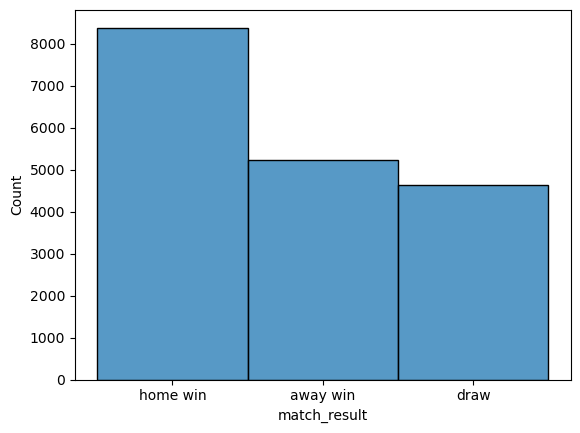

In [6]:
sns.histplot(df, x='match_result')

Играя на своем поле, команда более склонна к победе. Победы на своем поле на 80% более частые (Победа хозяина 46%, победа гостя 28,7%, ничья-25,3%).


In [7]:
df['match_result'].describe()

count        18243
unique           3
top       home win
freq          8381
Name: match_result, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18243 entries, 0 to 18242
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   18243 non-null  int64  
 1   season                               18243 non-null  object 
 2   stage                                18243 non-null  int64  
 3   date                                 18243 non-null  int64  
 4   league_name                          18243 non-null  object 
 5   match_result                         18243 non-null  object 
 6   home_team_goal                       18243 non-null  int64  
 7   home_team_name                       18243 non-null  object 
 8   away_team_goal                       18243 non-null  int64  
 9   away_team_name                       18243 non-null  object 
 10  home_team_api_id                     18243 non-null  int64  
 11  home_buildUpPlaySpeed       

In [9]:
# рассчитываем дельты показателей между командами по основным параметрам

In [10]:
df['deltaplayspeed']=df['home_buildUpPlaySpeed']-df['away_buildUpPlaySpeed']
df['deltapassing']=df['home_buildUpPlayPassing']-df['away_buildUpPlayPassing']
df['deltacrpassing'] = df['home_chanceCreationPassing']-df['away_chanceCreationPassing']
df['deltacrossing'] = df['home_chanceCreationCrossing']-df['away_chanceCreationCrossing']
df['deltashoot']=df['home_chanceCreationShooting']-df['away_chanceCreationShooting']
df['deltaPressure']=df['home_defencePressure']-df['away_defencePressure']
df['deltaAggr']=df['home_defenceAggression'] - df['away_defenceAggression']
df['deltaWidth']= df['home_defenceTeamWidth'] - df['away_defenceTeamWidth']

In [11]:
df.head()

id     season  stage  date             league_name match_result  \
0  377  2009/2010     19  2010  Belgium Jupiler League     home win   
1  379  2009/2010     19  2010  Belgium Jupiler League     away win   
2  382  2009/2010     19  2010  Belgium Jupiler League     home win   
3  405  2009/2010     22  2010  Belgium Jupiler League     home win   
4  406  2009/2010     22  2010  Belgium Jupiler League     away win   

   home_team_goal home_team_name  away_team_goal away_team_name  ...  \
0               3            AND               2            CLB  ...   
1               2            CHA               3            STL  ...   
2               1            MEC               0            BAC  ...   
3               2            CLB               1            WES  ...   
4               0            STL               4            AND  ...   

   home_result  away_result  deltaplayspeed  deltapassing  deltacrpassing  \
0            2            0            15.0          -5.0            25.0   
1            0            2           -13.0          10.0           -10.0   
2            2            0            30.0          25.0             5.0   
3            2            0           -10.0         -20.0             5.0   
4            0            2             3.0           5.0           -15.0   

   deltacrossing  deltashoot  deltaPressure  deltaAggr  deltaWidth  
0            0.0        15.0           10.0      -20.0         0.0  
1          -12.0        -5.0            0.0        0.0         5.0  
2            0.0         0.0          -10.0        0.0       -10.0  
3            5.0       -10.0          -10.0        0.0         0.0  
4            5.0         5.0            0.0       20.0        -5.0  

[5 rows x 66 columns]

                home_result  deltaplayspeed  deltapassing  deltacrpassing  \
home_result        1.000000       -0.001078     -0.092028        0.033113   
deltaplayspeed    -0.001078        1.000000      0.323605        0.266801   
deltapassing      -0.092028        0.323605      1.000000        0.133770   
deltacrpassing     0.033113        0.266801      0.133770        1.000000   
deltacrossing      0.025801        0.121882      0.174203        0.171281   
deltashoot         0.064271        0.117780     -0.047142        0.184493   
deltaPressure      0.115632       -0.000205     -0.210438        0.161383   
deltaAggr          0.057015        0.035248     -0.021367        0.035708   
deltaWidth         0.049913       -0.000664     -0.077241        0.078317   

                deltacrossing  deltashoot  deltaPressure  deltaAggr  \
home_result          0.025801    0.064271       0.115632   0.057015   
deltaplayspeed       0.121882    0.117780      -0.000205   0.035248   
deltapassing    

<Axes: >

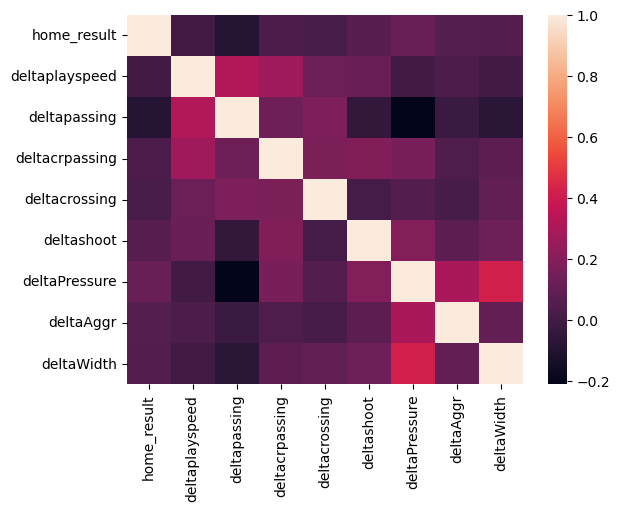

In [12]:
#рассчитываем корреляцию между победой/поражением и разницей показателей между командами

correlation = df[['home_result', 'deltaplayspeed', 'deltapassing', 'deltacrpassing', 'deltacrossing', 'deltashoot', 'deltaPressure', 'deltaAggr', 'deltaWidth']]
print(correlation.corr())
sns.heatmap(correlation.corr())

In [13]:
df['home_result'].value_counts()

home_result
2    8381
0    5234
1    4628
Name: count, dtype: int64

In [14]:
df.tail(4)

id     season  stage  date               league_name match_result  \
18239  25975  2015/2016      9  2015  Switzerland Super League     home win   
18240  25976  2015/2016      9  2015  Switzerland Super League     away win   
18241  25977  2015/2016      9  2015  Switzerland Super League     home win   
18242  25979  2015/2016      9  2015  Switzerland Super League     home win   

       home_team_goal home_team_name  away_team_goal away_team_name  ...  \
18239               1            GAL               0            THU  ...   
18240               1            VAD               2            LUZ  ...   
18241               2            GRA               0            SIO  ...   
18242               4             YB               3            BAS  ...   

       home_result  away_result  deltaplayspeed  deltapassing  deltacrpassing  \
18239            2            0            -6.0          13.0           -25.0   
18240            0            2           -10.0           5.0           -16.0   
18241            2            0           -11.0          17.0           -10.0   
18242            2            0            -9.0          18.0           -27.0   

       deltacrossing  deltashoot  deltaPressure  deltaAggr  deltaWidth  
18239            3.0       -29.0           -7.0       -9.0        -1.0  
18240           13.0       -20.0           -6.0      -20.0         8.0  
18241            4.0        -7.0           -9.0       -4.0        -7.0  
18242            0.0        -8.0           -3.0      -24.0        -3.0  

[4 rows x 66 columns]

ПРОВЕРИМ КОРРЕЛЯЦИЮ ПОБЕДЫ/ПОРАЖЕНИЯ КОМАНДЫ СЕГОДНЯ НА ДОМАШНЕМ ПОЛЕ С РЕЗУЛЬТАТАМИ 12 ПРЕДЫДУЩИХ МАТЧЕЙ

In [15]:
# Выбор случайных строк с home_result = 2 и строк с home_result = 0
wins_df = df[df['home_result'] == 2].sample(n=200)
loses_df = df[df['home_result'] == 0].sample(n=200)

# Объединение выборок в один DataFrame
sample_df = pd.concat([wins_df, loses_df])

# Функция для поиска 12 предыдущих матчей и подсчета результатов
def find_past_matches(row, original_df):
    # Находим предыдущие матчи для home_team_name
    past_matches = original_df[(original_df['id'] < row['id']) &
                                    ((original_df['home_team_name'] == row['home_team_name']) |
                                     (original_df['away_team_name'] == row['home_team_name']))].tail(12)


    # Подсчет результатов
    row['win'] = len(past_matches[past_matches['home_result'] == 2])
    row['draw'] = len(past_matches[past_matches['home_result'] == 1])
    row['lose'] = len(past_matches[past_matches['home_result'] == 0])

    return row

# Применяем функцию к каждой строке в выборке
results_df = sample_df.apply(lambda row: find_past_matches(row, df), axis=1)

# Выводим результаты
print(results_df[['id', 'home_team_name', 'win', 'draw', 'lose']])

          id home_team_name  win  draw  lose
6618    9324            WBR    4     4     4
15292  22335            LEV    6     2     4
10485  14640            VIT    7     3     2
3253    4743            SOU    5     3     4
17749  25336            GRA    5     4     3
...      ...            ...  ...   ...   ...
1954    3254            QPR    8     3     1
16951  23994            CEL    6     4     2
7822   11227            CAG    7     1     4
11127  15361            HAA    8     1     3
13592  19295            ACA    4     6     2

[400 rows x 5 columns]


In [16]:
results_df['sum']=results_df['win']+results_df['lose']+results_df['draw']

In [17]:
results_df.describe()

id       stage         date  home_team_goal  away_team_goal  \
count    400.000000  400.000000   400.000000      400.000000      400.000000   
mean   13395.025000   18.667500  2012.505000        1.575000        1.365000   
std     7381.480083   10.569116     1.648262        1.403317        1.300386   
min      572.000000    1.000000  2010.000000        0.000000        0.000000   
25%     6774.750000   10.000000  2011.000000        0.750000        0.000000   
50%    12944.500000   19.000000  2012.000000        1.000000        1.000000   
75%    20312.750000   27.000000  2014.000000        2.000000        2.000000   
max    25747.000000   38.000000  2015.000000        7.000000        8.000000   

       home_team_api_id  home_buildUpPlaySpeed  home_buildUpPlayPassing  \
count        400.000000             400.000000               400.000000   
mean        9376.492500              53.157500                47.440000   
std         7590.067489              11.636633                10.727726   
min         1601.000000              24.000000                22.000000   
25%         8527.500000              46.750000                38.000000   
50%         8697.000000              53.000000                48.000000   
75%         9908.000000              63.000000                54.000000   
max       158085.000000              78.000000                73.000000   

       home_buildUpPlayPositioningClass  home_chanceCreationPassing  ...  \
count                         400.00000                  400.000000  ...   
mean                            1.09000                   52.782500  ...   
std                             0.28654                   10.239008  ...   
min                             1.00000                   21.000000  ...   
25%                             1.00000                   48.000000  ...   
50%                             1.00000                   52.000000  ...   
75%                             1.00000                   60.000000  ...   
max                             2.00000                   77.000000  ...   

       deltacrpassing  deltacrossing  deltashoot  deltaPressure   deltaAggr  \
count      400.000000     400.000000  400.000000     400.000000  400.000000   
mean         0.912500      -0.310000    0.090000      -0.445000   -0.652500   
std         14.187779      15.763729   15.042026      14.156199   12.403078   
min        -40.000000     -44.000000  -57.000000     -40.000000  -40.000000   
25%         -9.000000     -12.000000  -11.000000      -9.000000   -8.250000   
50%          1.000000       0.000000    0.000000       0.000000    0.000000   
75%         11.000000      10.000000   11.000000       8.250000    8.000000   
max         47.000000      39.000000   49.000000      40.000000   32.000000   

       deltaWidth         win        draw        lose         sum  
count   400.00000  400.000000  400.000000  400.000000  400.000000  
mean     -0.18250    5.322500    2.925000    3.272500   11.520000  
std      12.56359    1.951413    1.655665    1.643166    1.998646  
min     -40.00000    0.000000    0.000000    0.000000    0.000000  
25%      -6.00000    4.000000    2.000000    2.000000   12.000000  
50%       0.00000    5.000000    3.000000    3.000000   12.000000  
75%       7.00000    7.000000    4.000000    4.000000   12.000000  
max      40.00000   10.000000    8.000000    8.000000   12.000000  

[8 rows x 65 columns]

C:\Users\vikto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sum', ylabel='Count'>

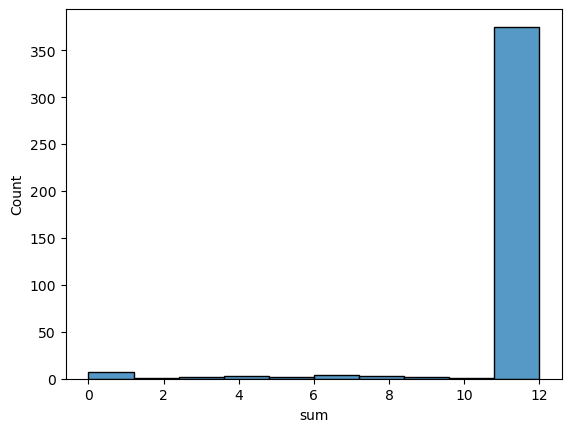

In [18]:
sns.histplot(results_df, x= 'sum')

In [19]:
dfhome = results_df[results_df['sum'] >= 12] #убираем из датафрейма значения, где меньше 12 предыдущих матчей
dfhome.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 6618 to 13592
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   372 non-null    int64  
 1   season                               372 non-null    object 
 2   stage                                372 non-null    int64  
 3   date                                 372 non-null    int64  
 4   league_name                          372 non-null    object 
 5   match_result                         372 non-null    object 
 6   home_team_goal                       372 non-null    int64  
 7   home_team_name                       372 non-null    object 
 8   away_team_goal                       372 non-null    int64  
 9   away_team_name                       372 non-null    object 
 10  home_team_api_id                     372 non-null    int64  
 11  home_buildUpPlaySpeed           

In [20]:
dfhome.describe() # проверяем, что остались тоолько результаты, где 12 матчей до сыграно

id       stage         date  home_team_goal  away_team_goal  \
count    372.000000  372.000000   372.000000      372.000000      372.000000   
mean   13255.043011   18.502688  2012.634409        1.575269        1.362903   
std     7430.226307   10.873816     1.605482        1.395886        1.319569   
min      581.000000    1.000000  2010.000000        0.000000        0.000000   
25%     6617.250000    9.000000  2011.000000        1.000000        0.000000   
50%    12723.500000   19.000000  2013.000000        1.000000        1.000000   
75%    20312.750000   27.000000  2014.000000        2.000000        2.000000   
max    25747.000000   38.000000  2015.000000        7.000000        8.000000   

       home_team_api_id  home_buildUpPlaySpeed  home_buildUpPlayPassing  \
count        372.000000             372.000000                372.00000   
mean        9435.561828              53.400538                 47.52957   
std         7851.519375              11.353582                 10.71597   
min         1601.000000              24.000000                 22.00000   
25%         8529.750000              47.000000                 38.00000   
50%         8697.000000              54.000000                 48.00000   
75%         9913.750000              63.000000                 54.25000   
max       158085.000000              78.000000                 73.00000   

       home_buildUpPlayPositioningClass  home_chanceCreationPassing  ...  \
count                        372.000000                  372.000000  ...   
mean                           1.094086                   52.981183  ...   
std                            0.292342                   10.227713  ...   
min                            1.000000                   21.000000  ...   
25%                            1.000000                   48.000000  ...   
50%                            1.000000                   52.500000  ...   
75%                            1.000000                   60.250000  ...   
max                            2.000000                   73.000000  ...   

       deltacrpassing  deltacrossing  deltashoot  deltaPressure   deltaAggr  \
count      372.000000     372.000000  372.000000     372.000000  372.000000   
mean         1.021505       0.059140   -0.091398      -0.586022   -0.381720   
std         14.317899      15.681354   15.293436      14.188588   12.007836   
min        -40.000000     -44.000000  -57.000000     -40.000000  -40.000000   
25%         -9.000000     -11.000000  -12.000000      -9.000000   -7.250000   
50%          1.000000       0.000000    0.000000       0.000000    0.000000   
75%         11.000000      10.000000   11.000000       8.250000    8.000000   
max         47.000000      39.000000   49.000000      40.000000   32.000000   

       deltaWidth         win        draw        lose    sum  
count  372.000000  372.000000  372.000000  372.000000  372.0  
mean    -0.220430    5.543011    3.040323    3.416667   12.0  
std     12.282164    1.766956    1.625600    1.564788    0.0  
min    -40.000000    1.000000    0.000000    0.000000   12.0  
25%     -6.000000    4.000000    2.000000    2.000000   12.0  
50%      0.000000    6.000000    3.000000    3.000000   12.0  
75%      6.250000    7.000000    4.000000    4.000000   12.0  
max     40.000000   10.000000    8.000000    8.000000   12.0  

[8 rows x 65 columns]

             home_result       win      draw      lose
home_result     1.000000 -0.056498 -0.048155  0.113823
win            -0.056498  1.000000 -0.577250 -0.529514
draw           -0.048155 -0.577250  1.000000 -0.387032
lose            0.113823 -0.529514 -0.387032  1.000000


<Axes: >

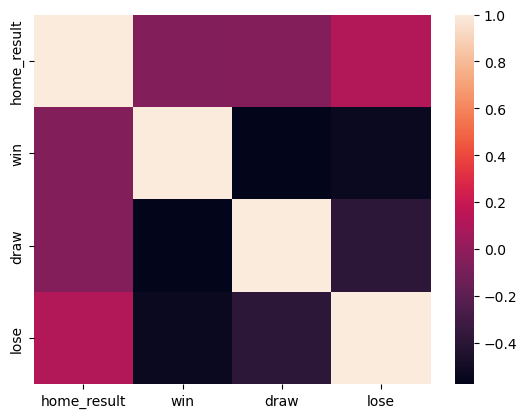

In [21]:
correlation = dfhome[['home_result', 'win', 'draw', 'lose']]
print(correlation.corr())
sns.heatmap(correlation.corr())
# корреляция между исходом матча дома и количеством предыдущих побед-поражений не выявлена

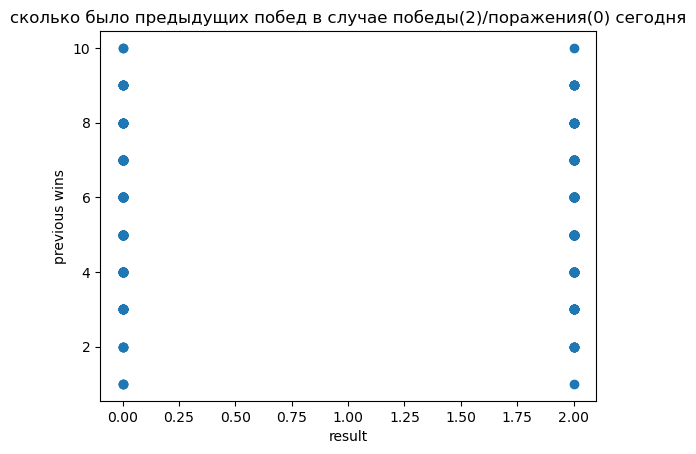

In [22]:
# Создание диаграммы рассеяния, чтобы изучить ситуацию с отсутствием корреляции детальнее
plt.scatter(dfhome['home_result'], dfhome['win'])

# Назначение названий осей
plt.xlabel('result')
plt.ylabel('previous wins')
plt.title ('сколько было предыдущих побед в случае победы(2)/поражения(0) сегодня')

# Отображение диаграммы
plt.show()

In [23]:
df_home_win = dfhome[dfhome['home_result'] == 2]
df_home_win.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 6618 to 1961
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   187 non-null    int64  
 1   season                               187 non-null    object 
 2   stage                                187 non-null    int64  
 3   date                                 187 non-null    int64  
 4   league_name                          187 non-null    object 
 5   match_result                         187 non-null    object 
 6   home_team_goal                       187 non-null    int64  
 7   home_team_name                       187 non-null    object 
 8   away_team_goal                       187 non-null    int64  
 9   away_team_name                       187 non-null    object 
 10  home_team_api_id                     187 non-null    int64  
 11  home_buildUpPlaySpeed            

C:\Users\vikto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


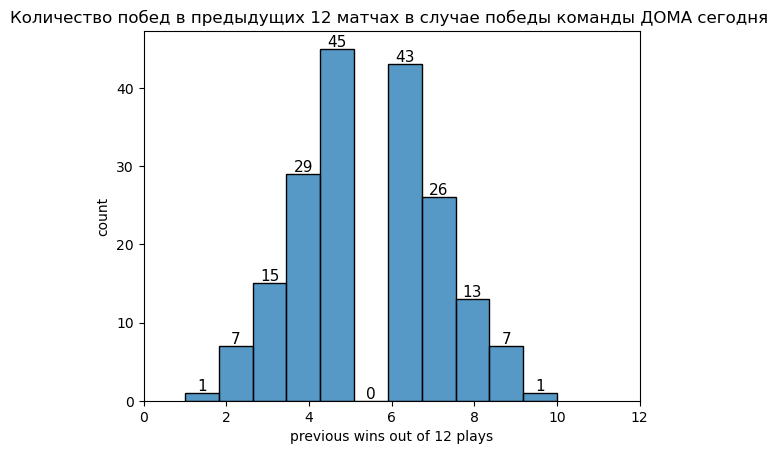

In [24]:
ax = sns.histplot(df_home_win, x= 'win')
plt.ylabel('count')
plt.xlabel('previous wins out of 12 plays')
plt.xlim(0, 12)
plt.title('Количество побед в предыдущих 12 матчах в случае победы команды ДОМА сегодня ')
for p in ax.patches:
   ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
# Отображение гистограммы
plt.savefig("гистограмма1.jpg", format='jpg', dpi=300)
plt.show()

In [25]:
frequency = df_home_win['win'].value_counts()

# Вывод результатов частоты предыдущих побед из 12 матчей в случае победы сегодня
print(frequency)

win
5     45
6     43
4     29
7     26
3     15
8     13
2      7
9      7
1      1
10     1
Name: count, dtype: int64


In [26]:
df_home_lose = dfhome[dfhome['home_result'] == 0]
frequency = df_home_lose['lose'].value_counts()

# Вывод результатов частоты предыдущих проигрышей из 12 матчей в случае победы сегодня
print(frequency)

lose
2    47
4    37
3    37
5    21
1    20
6    12
7     7
0     4
Name: count, dtype: int64


C:\Users\vikto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


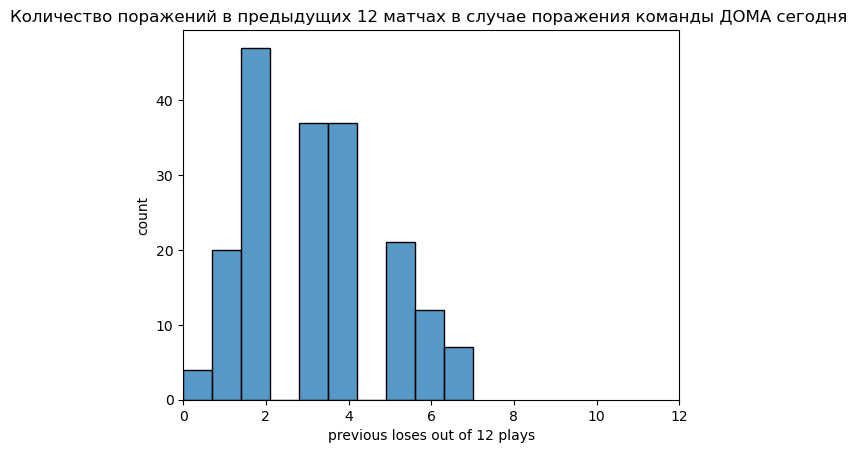

In [27]:
df_home_lose = dfhome[dfhome['home_result'] == 0]
ax = sns.histplot(df_home_lose, x= 'lose')
plt.ylabel('count')
plt.xlabel('previous loses out of 12 plays')
plt.title('Количество поражений в предыдущих 12 матчах в случае поражения команды ДОМА сегодня ')
plt.xlim(0, 12)
# Отображение гистограммы
plt.savefig("гистограмма2.jpg", format='jpg', dpi=300)
plt.show()

In [28]:
frequency = df_home_lose['lose'].value_counts()

# Вывод результатов
print(frequency)

lose
2    47
4    37
3    37
5    21
1    20
6    12
7     7
0     4
Name: count, dtype: int64


ПРОВЕРИМ РЕЗУЛЬТАТЫ ПРЕДЫДУЩИХ 12 МАТЧЕЙ КОМАНДЫ В СЛУЧАЕ ЕЕ ПОБЕДЫ/ПОРАЖЕНИЯ В ГОСТЯХ

In [29]:
# Выбор случайных  строк с away_result = 2 и строк с away_result = 0
wins_df = df[df['away_result'] == 2].sample(n=200)
loses_df = df[df['away_result'] == 0].sample(n=200)

# Объединение выборок в один DataFrame
sample_df = pd.concat([wins_df, loses_df])

# Функция для поиска 12 предыдущих матчей и подсчета результатов
def find_past_matches(row, original_df):
    # Находим предыдущие матчи для away_team_name
    past_matches = original_df[(original_df['id'] < row['id']) &
                                    ((original_df['away_team_name'] == row['home_team_name']) |
                                     (original_df['away_team_name'] == row['away_team_name']))].tail(12)


    # Подсчет результатов
    row['win'] = len(past_matches[past_matches['away_result'] == 2])
    row['draw'] = len(past_matches[past_matches['away_result'] == 1])
    row['lose'] = len(past_matches[past_matches['away_result'] == 0])

    return row

# Применяем функцию к каждой строке в выборке
results_df_away = sample_df.apply(lambda row: find_past_matches(row, df), axis=1)

# Выводим результаты
print(results_df_away[['id', 'away_team_name', 'win', 'draw', 'lose']])

          id away_team_name  win  draw  lose
367      882            CLB    4     2     6
5016    7073            NIC    2     2     8
2853    4153            ARS    6     3     3
1943    3243            EVE    2     5     5
2086    3386            FUL    3     2     7
...      ...            ...  ...   ...   ...
12942  18562            ACA    4     4     4
10931  15147            VIT    3     1     8
842     1442            ZUL    5     4     3
1657    2957            STK    7     1     4
8567   11972            PAL    3     6     3

[400 rows x 5 columns]


In [30]:
results_df_away['sum']=results_df_away['win']+results_df_away['lose']+results_df_away['draw']

C:\Users\vikto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sum', ylabel='Count'>

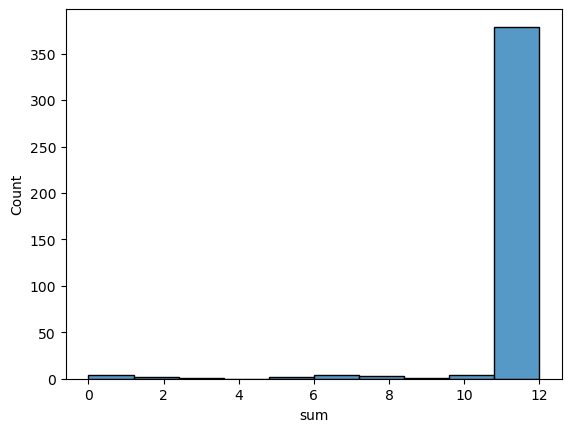

In [31]:
sns.histplot(results_df_away, x= 'sum')

In [32]:
df_away = results_df_away[results_df_away['sum'] >= 12] #убираем из датафрейма значения, где меньше 12 предыдущих матчей

In [33]:
df_away.describe() # проверяем, что везде есть результаты 12 матчей предыдущих

id       stage         date  home_team_goal  away_team_goal  \
count    379.000000  379.000000   379.000000      379.000000      379.000000   
mean   13163.432718   18.253298  2012.704485        1.482850        1.406332   
std     7301.982887   10.327915     1.620718        1.324014        1.240226   
min      617.000000    1.000000  2010.000000        0.000000        0.000000   
25%     6952.000000    9.000000  2011.000000        0.000000        0.000000   
50%    12708.000000   19.000000  2013.000000        1.000000        1.000000   
75%    19019.500000   27.000000  2014.000000        2.000000        2.000000   
max    25796.000000   38.000000  2015.000000        7.000000        7.000000   

       home_team_api_id  home_buildUpPlaySpeed  home_buildUpPlayPassing  \
count        379.000000             379.000000               379.000000   
mean        9177.944591              52.852243                47.472296   
std         5370.139007              11.272212                10.987783   
min         1601.000000              20.000000                23.000000   
25%         8464.000000              46.000000                38.000000   
50%         8689.000000              52.000000                48.000000   
75%         9909.000000              62.000000                54.000000   
max       108893.000000              76.000000                74.000000   

       home_buildUpPlayPositioningClass  home_chanceCreationPassing  ...  \
count                        379.000000                  379.000000  ...   
mean                           1.063325                   52.759894  ...   
std                            0.243868                   10.023933  ...   
min                            1.000000                   28.000000  ...   
25%                            1.000000                   47.000000  ...   
50%                            1.000000                   52.000000  ...   
75%                            1.000000                   60.000000  ...   
max                            2.000000                   80.000000  ...   

       deltacrpassing  deltacrossing  deltashoot  deltaPressure   deltaAggr  \
count      379.000000     379.000000  379.000000     379.000000  379.000000   
mean        -1.261214      -0.522427   -1.377309      -0.337731   -1.039578   
std         14.623597      15.342868   14.039536      12.977878   11.542240   
min        -40.000000     -45.000000  -45.000000     -39.000000  -37.000000   
25%        -11.500000     -11.000000  -13.000000     -10.000000   -9.000000   
50%         -1.000000       0.000000    0.000000       0.000000    0.000000   
75%          7.000000      10.000000    8.000000       9.000000    6.000000   
max         45.000000      49.000000   40.000000      40.000000   36.000000   

       deltaWidth         win        draw        lose    sum  
count  379.000000  379.000000  379.000000  379.000000  379.0  
mean     0.050132    3.575198    3.060686    5.364116   12.0  
std     11.328202    1.804321    1.373988    1.865697    0.0  
min    -35.000000    0.000000    0.000000    1.000000   12.0  
25%     -7.000000    2.000000    2.000000    4.000000   12.0  
50%      0.000000    3.000000    3.000000    5.000000   12.0  
75%      6.000000    5.000000    4.000000    7.000000   12.0  
max     40.000000    9.000000    8.000000   11.000000   12.0  

[8 rows x 65 columns]

In [34]:
df_away_win = df_away[df_away['away_result'] == 2]
df_away_win.describe()

id       stage         date  home_team_goal  away_team_goal  \
count    192.000000  192.000000   192.000000      192.000000      192.000000   
mean   12932.104167   18.645833  2012.697917        0.567708        2.250000   
std     7174.933447   10.368578     1.545944        0.690700        1.082947   
min      743.000000    1.000000  2010.000000        0.000000        1.000000   
25%     7044.000000    9.750000  2011.000000        0.000000        1.750000   
50%    12168.000000   19.000000  2013.000000        0.000000        2.000000   
75%    18756.750000   28.000000  2014.000000        1.000000        3.000000   
max    25584.000000   37.000000  2015.000000        3.000000        7.000000   

       home_team_api_id  home_buildUpPlaySpeed  home_buildUpPlayPassing  \
count        192.000000             192.000000               192.000000   
mean        9284.328125              53.333333                49.119792   
std         7405.334869              10.270852                10.909491   
min         1601.000000              29.000000                23.000000   
25%         8356.000000              47.000000                40.000000   
50%         8644.000000              53.000000                50.000000   
75%         9882.750000              62.000000                55.000000   
max       108893.000000              76.000000                74.000000   

       home_buildUpPlayPositioningClass  home_chanceCreationPassing  ...  \
count                        192.000000                  192.000000  ...   
mean                           1.036458                   52.166667  ...   
std                            0.187918                    9.354750  ...   
min                            1.000000                   30.000000  ...   
25%                            1.000000                   47.750000  ...   
50%                            1.000000                   52.000000  ...   
75%                            1.000000                   58.000000  ...   
max                            2.000000                   72.000000  ...   

       deltacrpassing  deltacrossing  deltashoot  deltaPressure   deltaAggr  \
count      192.000000     192.000000  192.000000     192.000000  192.000000   
mean        -2.541667      -1.437500   -1.723958      -3.093750   -1.489583   
std         13.724985      14.979786   13.027633      13.186601   11.528698   
min        -35.000000     -42.000000  -45.000000     -39.000000  -37.000000   
25%        -12.250000     -12.250000  -10.000000     -13.000000   -9.000000   
50%         -2.000000      -1.000000    0.000000      -2.500000    0.000000   
75%          4.000000       9.000000    6.250000       6.000000    4.000000   
max         40.000000      49.000000   26.000000      36.000000   36.000000   

       deltaWidth         win        draw        lose    sum  
count  192.000000  192.000000  192.000000  192.000000  192.0  
mean    -1.510417    3.640625    3.015625    5.343750   12.0  
std     11.084629    1.801981    1.386081    1.863556    0.0  
min    -35.000000    0.000000    0.000000    1.000000   12.0  
25%    -10.000000    2.000000    2.000000    4.000000   12.0  
50%      0.000000    4.000000    3.000000    5.000000   12.0  
75%      5.000000    5.000000    4.000000    6.000000   12.0  
max     25.000000    9.000000    8.000000   11.000000   12.0  

[8 rows x 65 columns]

             away_result       win      draw      lose
away_result     1.000000  0.036791 -0.033275 -0.011076
win             0.036791  1.000000 -0.335319 -0.720158
draw           -0.033275 -0.335319  1.000000 -0.412159
lose           -0.011076 -0.720158 -0.412159  1.000000


<Axes: >

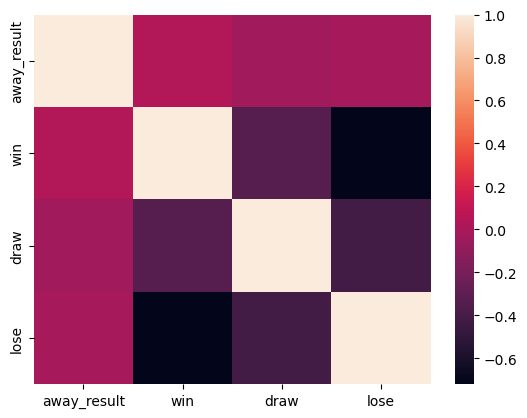

In [35]:
correlation = df_away[['away_result', 'win', 'draw', 'lose']]
print(correlation.corr())
sns.heatmap(correlation.corr())
# корреляция между исходом матча в гостях и количеством предыдущих побед-поражений

C:\Users\vikto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


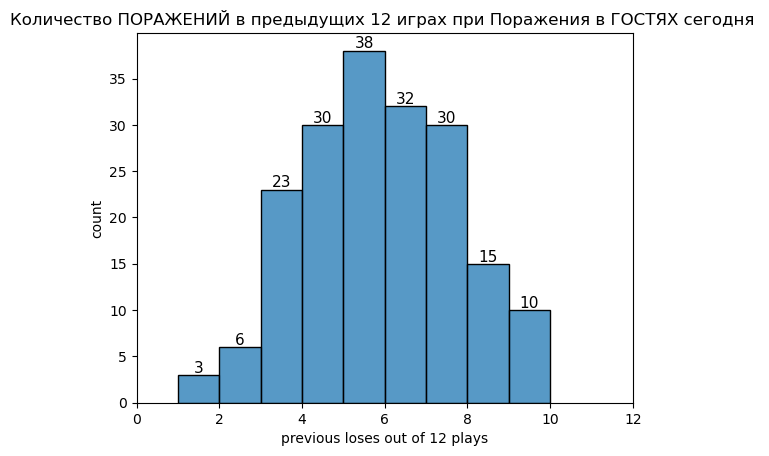

In [36]:
df_away_lose = df_away[df_away['away_result'] == 0]
ax = sns.histplot(df_away_lose, x= 'lose')
plt.ylabel('count')
plt.xlim(0, 12)
plt.xlabel('previous loses out of 12 plays')
plt.title('Количество ПОРАЖЕНИЙ в предыдущих 12 играх при Поражения в ГОСТЯХ сегодня ')
# Добавление подписей значений
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.savefig("гистограмма3.jpg", format='jpg', dpi=300)
# Отображение гистограммы
plt.show()

In [37]:
frequency = df_away_lose['lose'].value_counts()

# Вывод результатов
print(frequency)

lose
5     38
6     32
4     30
7     30
3     23
8     15
9      9
2      6
1      3
10     1
Name: count, dtype: int64


C:\Users\vikto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


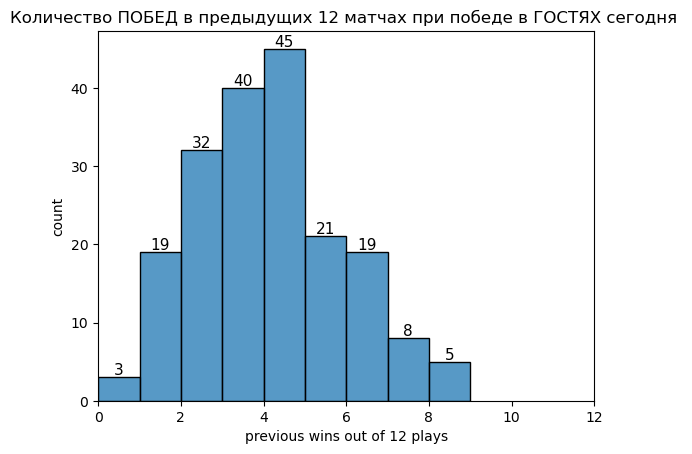

In [38]:
ax = sns.histplot(df_away_win, x= 'win')
plt.ylabel('count')
plt.xlim(0, 12)
plt.xlabel('previous wins out of 12 plays')
plt.title('Количество ПОБЕД в предыдущих 12 матчах при победе в ГОСТЯХ сегодня ')
plt.savefig("гистограмма4.jpg", format='jpg', dpi=300)
# Добавление подписей значений
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Отображение гистограммы
plt.show()

In [39]:
frequency = df_away_win['win'].value_counts()

# Вывод результатов
print(frequency)

win
4    45
3    40
2    32
5    21
6    19
1    19
7     8
8     4
0     3
9     1
Name: count, dtype: int64


In [40]:
df_away_win.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 367 to 6786
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   192 non-null    int64  
 1   season                               192 non-null    object 
 2   stage                                192 non-null    int64  
 3   date                                 192 non-null    int64  
 4   league_name                          192 non-null    object 
 5   match_result                         192 non-null    object 
 6   home_team_goal                       192 non-null    int64  
 7   home_team_name                       192 non-null    object 
 8   away_team_goal                       192 non-null    int64  
 9   away_team_name                       192 non-null    object 
 10  home_team_api_id                     192 non-null    int64  
 11  home_buildUpPlaySpeed             

In [41]:
df_away.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 367 to 8567
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   379 non-null    int64  
 1   season                               379 non-null    object 
 2   stage                                379 non-null    int64  
 3   date                                 379 non-null    int64  
 4   league_name                          379 non-null    object 
 5   match_result                         379 non-null    object 
 6   home_team_goal                       379 non-null    int64  
 7   home_team_name                       379 non-null    object 
 8   away_team_goal                       379 non-null    int64  
 9   away_team_name                       379 non-null    object 
 10  home_team_api_id                     379 non-null    int64  
 11  home_buildUpPlaySpeed             

In [42]:
display(df)

id     season  stage  date               league_name match_result  \
0        377  2009/2010     19  2010    Belgium Jupiler League     home win   
1        379  2009/2010     19  2010    Belgium Jupiler League     away win   
2        382  2009/2010     19  2010    Belgium Jupiler League     home win   
3        405  2009/2010     22  2010    Belgium Jupiler League     home win   
4        406  2009/2010     22  2010    Belgium Jupiler League     away win   
...      ...        ...    ...   ...                       ...          ...   
18238  25973  2015/2016      8  2015  Switzerland Super League         draw   
18239  25975  2015/2016      9  2015  Switzerland Super League     home win   
18240  25976  2015/2016      9  2015  Switzerland Super League     away win   
18241  25977  2015/2016      9  2015  Switzerland Super League     home win   
18242  25979  2015/2016      9  2015  Switzerland Super League     home win   

       home_team_goal home_team_name  away_team_goal away_team_name  ...  \
0                   3            AND               2            CLB  ...   
1                   2            CHA               3            STL  ...   
2                   1            MEC               0            BAC  ...   
3                   2            CLB               1            WES  ...   
4                   0            STL               4            AND  ...   
...               ...            ...             ...            ...  ...   
18238               3            ZUR               3            THU  ...   
18239               1            GAL               0            THU  ...   
18240               1            VAD               2            LUZ  ...   
18241               2            GRA               0            SIO  ...   
18242               4             YB               3            BAS  ...   

       home_result  away_result  deltaplayspeed  deltapassing  deltacrpassing  \
0                2            0            15.0          -5.0            25.0   
1                0            2           -13.0          10.0           -10.0   
2                2            0            30.0          25.0             5.0   
3                2            0           -10.0         -20.0             5.0   
4                0            2             3.0           5.0           -15.0   
...            ...          ...             ...           ...             ...   
18238            1            1             4.0          11.0           -17.0   
18239            2            0            -6.0          13.0           -25.0   
18240            0            2           -10.0           5.0           -16.0   
18241            2            0           -11.0          17.0           -10.0   
18242            2            0            -9.0          18.0           -27.0   

       deltacrossing  deltashoot  deltaPressure  deltaAggr  deltaWidth  
0                0.0        15.0           10.0      -20.0         0.0  
1              -12.0        -5.0            0.0        0.0         5.0  
2                0.0         0.0          -10.0        0.0       -10.0  
3                5.0       -10.0          -10.0        0.0         0.0  
4                5.0         5.0            0.0       20.0        -5.0  
...              ...         ...            ...        ...         ...  
18238           14.0       -12.0            0.0       -2.0         3.0  
18239            3.0       -29.0           -7.0       -9.0        -1.0  
18240           13.0       -20.0           -6.0      -20.0         8.0  
18241            4.0        -7.0           -9.0       -4.0        -7.0  
18242            0.0        -8.0           -3.0      -24.0        -3.0  

[18243 rows x 66 columns]

# Гипотеза №2
## Если команда чаще всего выигрывала с большим разрывом в счете, то у неё больше вероятности одерживать победу и в других матчах.

In [43]:
#разрыв в счете для home и away команды по рез-ам каждого матча
df['score_gap_home']=df['home_team_goal']-df['away_team_goal']
df['score_gap_away']=df['away_team_goal']-df['home_team_goal']

#среднее значение разрыва по счету в "домашних" и "выездных" командах
df_gr1=np.round(df.groupby('home_team_api_id')['score_gap_home'].agg('mean').to_frame(),2)
df_gr2=np.round(df.groupby('away_team_api_id')['score_gap_away'].agg('mean').to_frame(),2)
df_gr1 = df_gr1.reset_index()
df_gr2 = df_gr2.reset_index()

#объединение в один ДФ среднего значения разрыва в счете по каждой команде
df_gr=df_gr1.merge(df_gr2, left_on='home_team_api_id', right_on='away_team_api_id', suffixes=('', ''))
df_gr.drop(['away_team_api_id'], axis=1, inplace=True)
df_gr.rename(columns={'home_team_api_id':'team_id'}, inplace=True)
df_gr['mean_score_gap']=np.round((df_gr['score_gap_home']+df_gr['score_gap_away'])/2,2)

df['winner'] = df.apply(lambda row: row['home_team_api_id'] if row['home_team_goal'] > row['away_team_goal'] else (row['away_team_api_id'] if row['home_team_goal'] < row['away_team_goal'] else 0), axis=1)

#сколько побед одержала каждая команда
df_gr3=df.groupby('winner')['winner'].agg('count').to_frame()

df_gr3.rename(columns={'winner':'wins'},inplace=True)
df_gr3.index.names = ['team_id']
df_gr3.reset_index()

df_merged=df_gr.merge(df_gr3, how='left', on='team_id')
df_merged.drop(['score_gap_home','score_gap_away'], axis=1, inplace=True)

df=df.merge(df_merged, left_on='home_team_api_id', right_on='team_id')
df.drop(['team_id'],axis=1, inplace=True)
df=df.rename(columns={'mean_score_gap': 'avg_score_gap_home', 'wins' : 'wins_home'})

df=df.merge(df_merged, left_on='away_team_api_id', right_on='team_id')
df.drop(['team_id'],axis=1, inplace=True)
df=df.rename(columns={'mean_score_gap': 'avg_score_gap_away', 'wins' : 'wins_away'})

<Axes: >

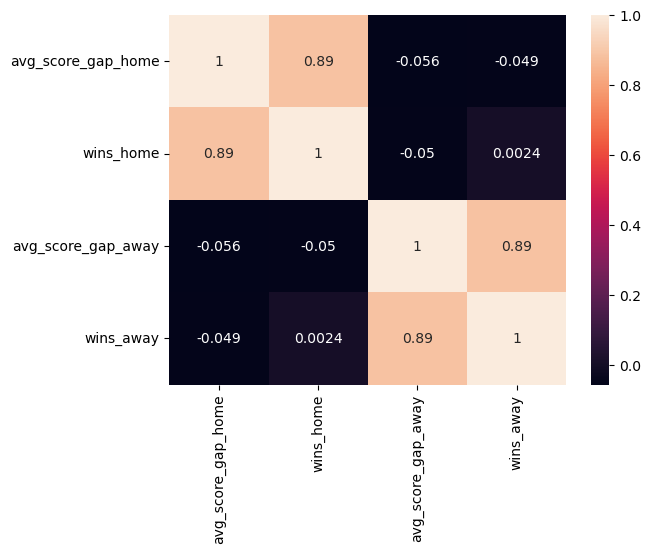

In [44]:
sns.heatmap(df[['avg_score_gap_home', 'wins_home','avg_score_gap_away','wins_away']].corr(numeric_only=True),annot=True)

In [45]:
display(df.head())

id     season  stage  date             league_name match_result  \
0  377  2009/2010     19  2010  Belgium Jupiler League     home win   
1  379  2009/2010     19  2010  Belgium Jupiler League     away win   
2  382  2009/2010     19  2010  Belgium Jupiler League     home win   
3  405  2009/2010     22  2010  Belgium Jupiler League     home win   
4  406  2009/2010     22  2010  Belgium Jupiler League     away win   

   home_team_goal home_team_name  away_team_goal away_team_name  ...  \
0               3            AND               2            CLB  ...   
1               2            CHA               3            STL  ...   
2               1            MEC               0            BAC  ...   
3               2            CLB               1            WES  ...   
4               0            STL               4            AND  ...   

   deltaPressure  deltaAggr  deltaWidth  score_gap_home  score_gap_away  \
0           10.0      -20.0         0.0               1              -1   
1            0.0        0.0         5.0              -1               1   
2          -10.0        0.0       -10.0               1              -1   
3          -10.0        0.0         0.0               1              -1   
4            0.0       20.0        -5.0              -4               4   

   winner  avg_score_gap_home  wins_home  avg_score_gap_away  wins_away  
0    8635                1.18         86                0.80         73  
1    9985               -0.36         26                0.16         64  
2    8203               -0.14         49               -0.77         17  
3    8342                0.80         73               -0.57         21  
4    8635                0.16         64                1.18         86  

[5 rows x 73 columns]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18243 entries, 0 to 18242
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   18243 non-null  int64  
 1   season                               18243 non-null  object 
 2   stage                                18243 non-null  int64  
 3   date                                 18243 non-null  int64  
 4   league_name                          18243 non-null  object 
 5   match_result                         18243 non-null  object 
 6   home_team_goal                       18243 non-null  int64  
 7   home_team_name                       18243 non-null  object 
 8   away_team_goal                       18243 non-null  int64  
 9   away_team_name                       18243 non-null  object 
 10  home_team_api_id                     18243 non-null  int64  
 11  home_buildUpPlaySpeed       

# Гипотеза № 3
## Если в команде играют топовые игроки, то такая команда побеждает чаще.

In [47]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    183978 non-null  int64  
 1   player_fifa_api_id    183978 non-null  int64  
 2   player_api_id         183978 non-null  int64  
 3   date                  183978 non-null  object 
 4   overall_rating        183142 non-null  float64
 5   potential             183142 non-null  float64
 6   preferred_foot        183142 non-null  object 
 7   attacking_work_rate   177109 non-null  object 
 8   defensive_work_rate   183142 non-null  object 
 9   crossing              183142 non-null  float64
 10  finishing             183142 non-null  float64
 11  heading_accuracy      183142 non-null  float64
 12  short_passing         183142 non-null  float64
 13  volleys               181265 non-null  float64
 14  dribbling             183142 non-null  float64
 15  

Предобработка файла об игроках

In [48]:
players['date'] = pd.to_datetime(players['date'])
players['birthday'] = pd.to_datetime(players['birthday'])
players = players.drop(columns = ['id','player_fifa_api_id', 'id.1', 'player_fifa_api_id.1', 'height', 'weight'])
players = players.dropna().reset_index(drop = True)

In [49]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177037 entries, 0 to 177036
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   player_api_id        177037 non-null  int64         
 1   date                 177037 non-null  datetime64[ns]
 2   overall_rating       177037 non-null  float64       
 3   potential            177037 non-null  float64       
 4   preferred_foot       177037 non-null  object        
 5   attacking_work_rate  177037 non-null  object        
 6   defensive_work_rate  177037 non-null  object        
 7   crossing             177037 non-null  float64       
 8   finishing            177037 non-null  float64       
 9   heading_accuracy     177037 non-null  float64       
 10  short_passing        177037 non-null  float64       
 11  volleys              177037 non-null  float64       
 12  dribbling            177037 non-null  float64       
 13  curve         

Создание среднего значения рейтинга игрока на основе его показателей. Отдельно по показателям вратаря, отдельно остальные.

In [50]:
cols = ['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']

players['gk_avg'] = round(players[cols]. sum (axis= 1 ) / 5, 2)

cols_1 = ['crossing','finishing','heading_accuracy',
          'short_passing','volleys','dribbling','curve',
          'free_kick_accuracy','long_passing','ball_control',
          'acceleration','sprint_speed','agility','reactions',
          'balance','shot_power','jumping','stamina','strength',
          'long_shots','aggression','interceptions','positioning',
          'vision','penalties','marking','standing_tackle','sliding_tackle']

players['rate_avg'] = round(players[cols_1]. sum (axis= 1 ) / 28, 2)

Преобразование строковых данных в числовые.

In [51]:
players.defensive_work_rate.value_counts()

defensive_work_rate
medium    130764
high       26972
low        18425
ormal        317
es            94
2             89
tocky         86
ean           78
1             44
6             34
5             28
4             27
3             23
0             20
9             17
7             14
8              5
Name: count, dtype: int64

In [52]:
dict_to_replace_preferred_foot = {'left':2, 'right':1}
dict_to_replace_attacking_work_rate = {'medium':2, 'high':3, 'low':1, 'norm':2, 'y':0, 'stoc':0, 'le':0}
dict_to_replace_defensive_work_rate = {'ormal':'medium', 'es':'low', 'tocky':'low', 'ean':'low',
                                       '0':'low', '1':'low', '2':'low', '3':'low', '4':'medium', '5':'medium',
                                       '6':'medium', '7': 'high' , '8': 'high', '9': 'high'}

In [53]:
players.preferred_foot.replace(dict_to_replace_preferred_foot, inplace=True)

players.attacking_work_rate.replace(dict_to_replace_attacking_work_rate, inplace=True)

players.defensive_work_rate.replace(dict_to_replace_defensive_work_rate, inplace=True)

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\1404625783.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  players.preferred_foot.replace(dict_to_replace_preferred_foot, inplace=True)
C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\1404625783.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [54]:
players.defensive_work_rate.value_counts()

defensive_work_rate
medium    131170
high       27008
low        18859
Name: count, dtype: int64

In [55]:
dict_defensive_work_rate = {'medium':2, 'high':3, 'low':1}

In [56]:
players.defensive_work_rate.replace(dict_defensive_work_rate, inplace=True)

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\2054839904.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  players.defensive_work_rate.replace(dict_defensive_work_rate, inplace=True)


Создание данных о возрасте футболиста.

In [57]:
#players['age']=round((players.date - players.birthday).dt.days/365.25)
#players['age'] = players['age'].dt.days.astype('int16')
#players['age_1']=players.date - players.birthday

players['age'] = (players['date'] - players['birthday']).dt.days // 365
players['age'] = players['age'].astype('int16')
#players.drop(columns = 'age_1', inplace=True)

Вывод только нужных для анализа данных.

In [58]:
players_short = players[['player_api_id', 'player_name' ,
                         'birthday','date','age', 'overall_rating',
                         'potential', 'preferred_foot', 'attacking_work_rate',
                         'defensive_work_rate','gk_avg', 'rate_avg']]
players_short.head()

player_api_id         player_name   birthday       date  age  \
0         505942  Aaron Appindangoye 1992-02-29 2016-02-18   23   
1         505942  Aaron Appindangoye 1992-02-29 2015-11-19   23   
2         505942  Aaron Appindangoye 1992-02-29 2015-09-21   23   
3         505942  Aaron Appindangoye 1992-02-29 2015-03-20   23   
4         505942  Aaron Appindangoye 1992-02-29 2007-02-22   14   

   overall_rating  potential  preferred_foot  attacking_work_rate  \
0            67.0       71.0               1                    2   
1            67.0       71.0               1                    2   
2            62.0       66.0               1                    2   
3            61.0       65.0               1                    2   
4            61.0       65.0               1                    2   

   defensive_work_rate  gk_avg  rate_avg  
0                    2     8.6     56.46  
1                    2     8.6     56.46  
2                    2     8.6     55.04  
3                    2     7.6     54.07  
4                    2     7.6     54.07

In [59]:
players_short.corr(numeric_only = True)

player_api_id       age  overall_rating  potential  \
player_api_id             1.000000 -0.619689       -0.331223   0.010479   
age                      -0.619689  1.000000        0.383178  -0.122414   
overall_rating           -0.331223  0.383178        1.000000   0.765294   
potential                 0.010479 -0.122414        0.765294   1.000000   
preferred_foot            0.007937 -0.010835        0.002180   0.004211   
attacking_work_rate       0.043965 -0.058349        0.124830   0.132307   
defensive_work_rate      -0.034059  0.062032        0.053413   0.013731   
gk_avg                   -0.147796  0.088212        0.017955   0.024756   
rate_avg                 -0.156718  0.123175        0.497352   0.400569   

                     preferred_foot  attacking_work_rate  defensive_work_rate  \
player_api_id              0.007937             0.043965            -0.034059   
age                       -0.010835            -0.058349             0.062032   
overall_rating             0.002180             0.124830             0.053413   
potential                  0.004211             0.132307             0.013731   
preferred_foot             1.000000             0.045117            -0.031343   
attacking_work_rate        0.045117             1.000000            -0.031939   
defensive_work_rate       -0.031343            -0.031939             1.000000   
gk_avg                    -0.074565            -0.123778            -0.028804   
rate_avg                   0.096186             0.243414             0.076632   

                       gk_avg  rate_avg  
player_api_id       -0.147796 -0.156718  
age                  0.088212  0.123175  
overall_rating       0.017955  0.497352  
potential            0.024756  0.400569  
preferred_foot      -0.074565  0.096186  
attacking_work_rate -0.123778  0.243414  
defensive_work_rate -0.028804  0.076632  
gk_avg               1.000000 -0.697277  
rate_avg            -0.697277  1.000000

In [60]:
players_short.describe()

player_api_id                       birthday  \
count  177037.000000                         177037   
mean   138021.981682  1987-06-03 02:36:48.311256832   
min      2625.000000            1969-01-15 00:00:00   
25%     35477.000000            1984-02-13 00:00:00   
50%     89079.000000            1987-09-21 00:00:00   
75%    192856.000000            1991-01-08 00:00:00   
max    750584.000000            1999-04-24 00:00:00   
std    137764.775099                            NaN   

                                date            age  overall_rating  \
count                         177037  177037.000000   177037.000000   
mean   2013-01-20 01:35:39.274841088      25.160379       68.680248   
min              2007-02-22 00:00:00       7.000000       33.000000   
25%              2011-08-30 00:00:00      22.000000       64.000000   
50%              2013-09-20 00:00:00      25.000000       69.000000   
75%              2015-01-09 00:00:00      28.000000       73.000000   
max              2016-07-07 00:00:00      43.000000       94.000000   
std                              NaN       4.717888        7.034967   

           potential  preferred_foot  attacking_work_rate  \
count  177037.000000   177037.000000        177037.000000   
mean       73.515372        1.243955             2.190570   
min        39.000000        1.000000             0.000000   
25%        69.000000        1.000000             2.000000   
50%        74.000000        1.000000             2.000000   
75%        78.000000        1.000000             2.000000   
max        97.000000        2.000000             3.000000   
std         6.588703        0.429467             0.509709   

       defensive_work_rate         gk_avg       rate_avg  
count        177037.000000  177037.000000  177037.000000  
mean              2.046030      16.639021      58.355477  
min               1.000000       1.000000      15.570000  
25%               2.000000       9.400000      54.320000  
50%               2.000000      10.600000      60.110000  
75%               2.000000      12.400000      65.110000  
max               3.000000      89.800000      84.000000  
std               0.506916      16.236911      10.424518

Посмотрим на изменения скоров игроков с рейтингом более 80 баллов со временем.

In [61]:
pltly.line(players_short[players_short['rate_avg'] >= 80], x ='date', y= 'rate_avg', color = 'player_name')

C:\Users\vikto\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])
C:\Users\vikto\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


Посмотрим на максимальную разницу в рейтинге игроков из года в год.

In [62]:
players_short.head()

player_api_id         player_name   birthday       date  age  \
0         505942  Aaron Appindangoye 1992-02-29 2016-02-18   23   
1         505942  Aaron Appindangoye 1992-02-29 2015-11-19   23   
2         505942  Aaron Appindangoye 1992-02-29 2015-09-21   23   
3         505942  Aaron Appindangoye 1992-02-29 2015-03-20   23   
4         505942  Aaron Appindangoye 1992-02-29 2007-02-22   14   

   overall_rating  potential  preferred_foot  attacking_work_rate  \
0            67.0       71.0               1                    2   
1            67.0       71.0               1                    2   
2            62.0       66.0               1                    2   
3            61.0       65.0               1                    2   
4            61.0       65.0               1                    2   

   defensive_work_rate  gk_avg  rate_avg  
0                    2     8.6     56.46  
1                    2     8.6     56.46  
2                    2     8.6     55.04  
3                    2     7.6     54.07  
4                    2     7.6     54.07

In [63]:
M = players_short.sort_values(['player_api_id','date'], ascending=[False, True])
M.reset_index(drop=True, inplace = True)

<Axes: >

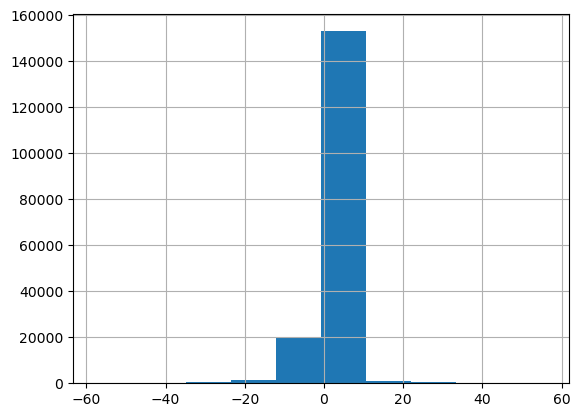

In [64]:
M['rate_avg'] = M['rate_avg'].diff(periods = 1)
M['rate_avg'].hist()

<Axes: >

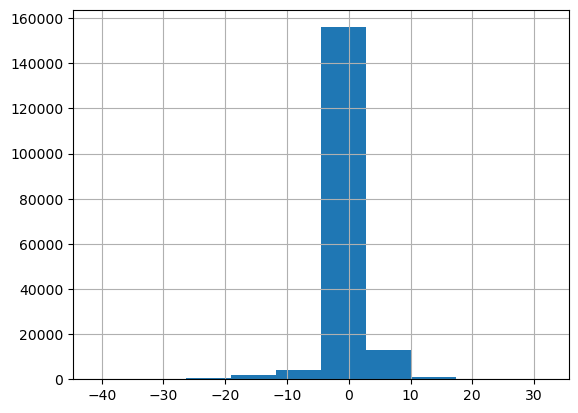

In [65]:
M['overall_rating_match_diff'] = M['overall_rating'].diff(periods = 1)
M['overall_rating_match_diff'].hist()

Судя по распределениям, общий рейтинг меняется в основном в пределах (-5:5), т.е. как растет, так и уменьшается, а рейтинг по навыкам меняется в пределах (0:10), т.е. в основном уменьшается от матча к матчу.

Группировка по id игрока с последующим вычислением среднего балла по всем записям за разные годы.

In [66]:
K=players_short.groupby(by = ['player_api_id'])

In [67]:
players_avg=round(K[['age', 'overall_rating', 'potential', 'gk_avg', 'rate_avg', 'preferred_foot','attacking_work_rate','defensive_work_rate']].agg('mean'),2)

In [68]:
players_avg.reset_index(inplace=True)

In [69]:
players_avg.head()

player_api_id    age  overall_rating  potential  gk_avg  rate_avg  \
0           2625  30.36           60.14      61.14   13.03     58.18   
1           2752  29.33           69.38      70.38    9.70     50.76   
2           2768  29.67           69.29      70.57   15.32     54.63   
3           2770  28.33           71.13      73.53   16.97     61.64   
4           2796  25.47           64.60      70.53   64.00     30.53   

   preferred_foot  attacking_work_rate  defensive_work_rate  
0            1.00                 2.43                  2.0  
1            1.00                 2.00                  2.0  
2            2.00                 2.00                  2.0  
3            1.47                 2.00                  1.0  
4            1.00                 2.00                  2.0

In [70]:
players_avg.shape

(10048, 9)

In [71]:
players_avg.preferred_foot=players_avg.preferred_foot.apply(lambda x: round(x))
players_avg.attacking_work_rate=players_avg.attacking_work_rate.apply(lambda x: round(x))
players_avg.defensive_work_rate=players_avg.defensive_work_rate.apply(lambda x: round(x))

In [72]:
players_avg.drop(columns = 'gk_avg', inplace = True)

In [73]:
players_avg.describe()

player_api_id           age  overall_rating     potential  \
count   10048.000000  10048.000000    10048.000000  10048.000000   
mean   165372.880971     24.668949       66.959352     72.171394   
std    164026.281060      4.400419        6.181939      5.746884   
min      2625.000000     12.500000       45.200000     51.000000   
25%     37194.750000     21.280000       63.000000     68.110000   
50%    109629.500000     24.380000       66.850000     72.140000   
75%    238858.000000     27.820000       71.000000     76.000000   
max    750584.000000     40.440000       92.190000     95.230000   

           rate_avg  preferred_foot  attacking_work_rate  defensive_work_rate  
count  10048.000000    10048.000000         10048.000000         10048.000000  
mean      56.680288        1.242436             2.149482             2.027966  
std        9.960925        0.428578             0.487474             0.460129  
min       18.500000        1.000000             0.000000             1.000000  
25%       53.110000        1.000000             2.000000             2.000000  
50%       58.390000        1.000000             2.000000             2.000000  
75%       62.990000        1.000000             2.000000             2.000000  
max       79.690000        2.000000             3.000000             3.000000

In [74]:
players_avg.corr()

player_api_id       age  overall_rating  potential  \
player_api_id             1.000000 -0.731911       -0.433933  -0.024965   
age                      -0.731911  1.000000        0.454073  -0.035533   
overall_rating           -0.433933  0.454073        1.000000   0.805176   
potential                -0.024965 -0.035533        0.805176   1.000000   
rate_avg                 -0.197559  0.147448        0.475685   0.399255   
preferred_foot           -0.004768 -0.005698        0.000799   0.003687   
attacking_work_rate       0.046920 -0.080192        0.112128   0.128835   
defensive_work_rate      -0.024229  0.049935        0.039542   0.003836   

                     rate_avg  preferred_foot  attacking_work_rate  \
player_api_id       -0.197559       -0.004768             0.046920   
age                  0.147448       -0.005698            -0.080192   
overall_rating       0.475685        0.000799             0.112128   
potential            0.399255        0.003687             0.128835   
rate_avg             1.000000        0.106044             0.214325   
preferred_foot       0.106044        1.000000             0.048528   
attacking_work_rate  0.214325        0.048528             1.000000   
defensive_work_rate  0.059488       -0.024290            -0.031508   

                     defensive_work_rate  
player_api_id                  -0.024229  
age                             0.049935  
overall_rating                  0.039542  
potential                       0.003836  
rate_avg                        0.059488  
preferred_foot                 -0.024290  
attacking_work_rate            -0.031508  
defensive_work_rate             1.000000

<Axes: xlabel='age', ylabel='overall_rating'>

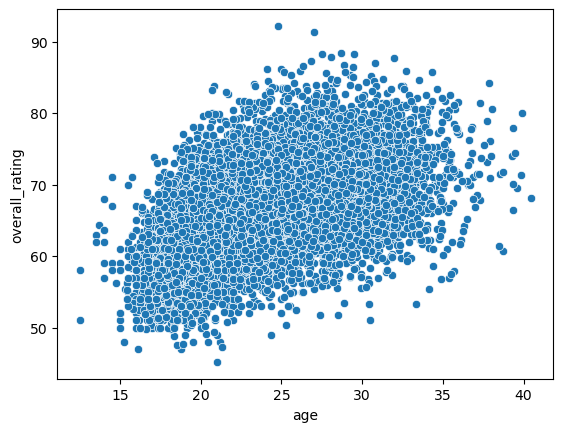

In [75]:
sns.scatterplot(players_avg, x = 'age' , y = 'overall_rating')

<Axes: xlabel='age', ylabel='rate_avg'>

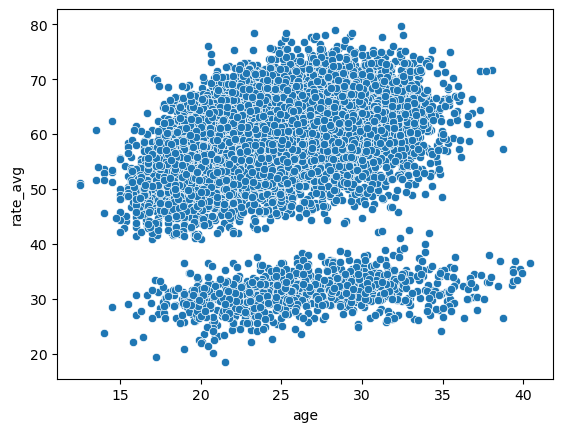

In [76]:
sns.scatterplot(players_avg, x = 'age' , y = 'rate_avg')

Существует относительно сильная корреляция возраста игрока и его общего рейтинга, в то время как такой корреляции между возрастом и рейтингом, основанным на навыках игрока не наблюдается. Можно предположить, что общий рейтинг складывается не только на данных по навыкам, в нем может присутствовать элемент субъективности выставления оценки.

Кроме того, на первом графике видно, что есть небольшое смещение у более молодых игроков в зону более низкого рейтинга. Это может быть связано с нехваткой опыта, недостаточным количеством сыгранных матчей, отсутствием данных по более молодым игрокам.

Посмотрим на распределение разницы потенциала и среднего рейтинга.

<Axes: >

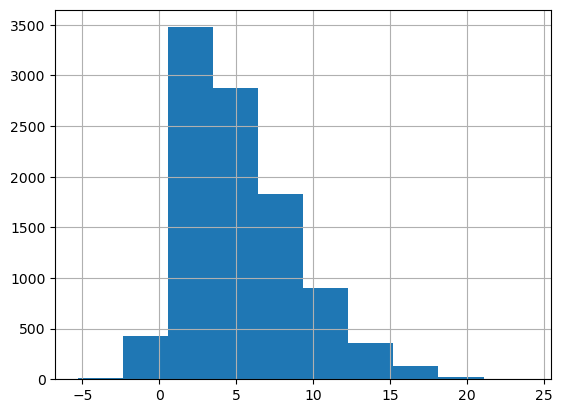

In [77]:
players_avg['potential_diff']=players_avg['potential'] - players_avg['overall_rating']
players_avg['potential_diff'].hist()

In [78]:
players_avg['potential_diff'].median()

4.4950000000000045

Разница потенциалов незначительная. Скорее всего данный критерий не влияет глобально на возможность выигрыша в матче.

Общее количество игроков, а также количество лучших игроков для определения критерия и числа топов:

<Axes: >

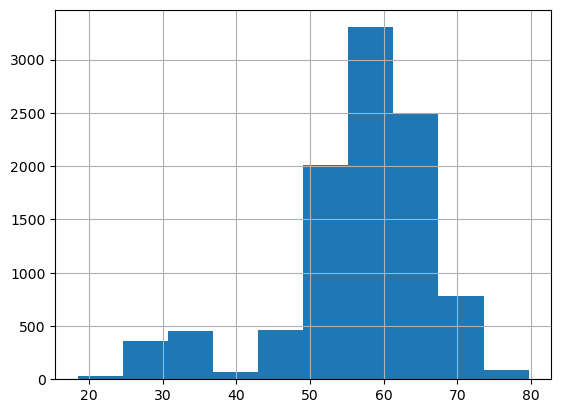

In [79]:
players_avg['rate_avg'].hist()

<Axes: >

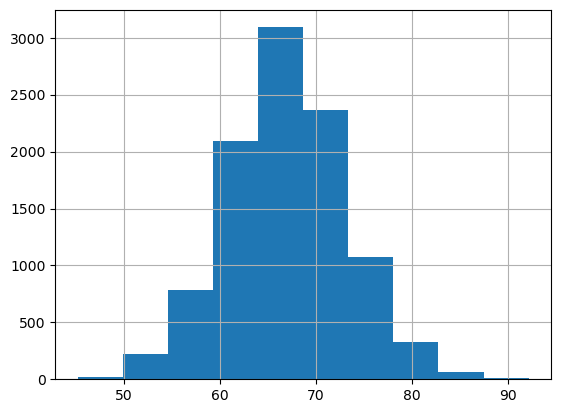

In [80]:
players_avg['overall_rating'].hist()

In [81]:
print('Всего игроков: ', len(players_avg))
print('Игроков с рейтингом более 65 баллов по навыкам: ', len(players_avg[players_avg['rate_avg'] >=65]))
print('Игроков с общим рейтингом более 70 баллов: ', len(players_avg[players_avg['overall_rating'] >=70]))

Всего игроков:  10048
Игроков с рейтингом более 65 баллов по навыкам:  1664
Игроков с общим рейтингом более 70 баллов:  3076


Отбор 10% наиболее успешных игроков по рейтингу навыков.

In [82]:
rate_avg_top = players_avg.nlargest(n=150, columns = 'rate_avg')

Отбор 10% наиболее успешных игроков по общему рейтингу.

In [83]:
overall_rate_top = players_avg.nlargest(n=300, columns = 'overall_rating')

Создание списков id лучших игроков по двум критериям (общий рейтинг, рейтинг на основе показателей)

In [84]:
id_list_avg_rate = list(rate_avg_top['player_api_id'])
id_list_all_rate = list(overall_rate_top['player_api_id'])

In [85]:
set_1=set(id_list_avg_rate)
set_2=set(id_list_all_rate)

In [86]:
set_3=set_1.intersection(set_2)
print(set_3)

{34305, 40964, 30724, 38433, 27694, 26160, 33888, 30829, 30834, 34942, 34944, 178818, 248453, 96398, 30871, 30872, 30878, 30373, 30889, 37549, 30893, 30894, 31921, 80562, 41658, 40636, 30909, 33988, 27335, 41167, 30930, 26852, 34534, 23782, 30955, 30958, 30962, 40196, 30981, 36615, 30474, 24846, 49939, 27427, 30509, 28467, 20276, 26419, 32569, 25923, 31045, 30536, 38244, 33639, 42346, 39792, 31097, 40825, 35724, 30612, 30613, 38807, 30618, 38817, 41890, 38818, 11685, 30631, 46509, 39854, 143793, 20401, 38834, 30645, 24507, 21446, 24011, 73167, 30675, 30682, 30684, 30699, 26096, 30706}


In [87]:
top_id_set = set_1.union(set_2)
top_id_list = list(top_id_set)
print(len(top_id_list))

366


Начнем работу с файлом по матчам. Предобработаем.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18243 entries, 0 to 18242
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   18243 non-null  int64  
 1   season                               18243 non-null  object 
 2   stage                                18243 non-null  int64  
 3   date                                 18243 non-null  int64  
 4   league_name                          18243 non-null  object 
 5   match_result                         18243 non-null  object 
 6   home_team_goal                       18243 non-null  int64  
 7   home_team_name                       18243 non-null  object 
 8   away_team_goal                       18243 non-null  int64  
 9   away_team_name                       18243 non-null  object 
 10  home_team_api_id                     18243 non-null  int64  
 11  home_buildUpPlaySpeed       

In [89]:
df.columns.values.tolist()

['id',
 'season',
 'stage',
 'date',
 'league_name',
 'match_result',
 'home_team_goal',
 'home_team_name',
 'away_team_goal',
 'away_team_name',
 'home_team_api_id',
 'home_buildUpPlaySpeed',
 'home_buildUpPlayPassing',
 'home_buildUpPlayPositioningClass',
 'home_chanceCreationPassing',
 'home_chanceCreationCrossing',
 'home_chanceCreationShooting',
 'home_chanceCreationPositioningClass',
 'home_defencePressure',
 'home_defenceAggression',
 'home_defenceTeamWidth',
 'home_defenceDefenderLineClass',
 'away_team_api_id',
 'away_buildUpPlaySpeed',
 'away_buildUpPlayPassing',
 'away_buildUpPlayPositioningClass',
 'away_chanceCreationPassing',
 'away_chanceCreationCrossing',
 'away_chanceCreationShooting',
 'away_chanceCreationPositioningClass',
 'away_defencePressure',
 'away_defenceAggression',
 'away_defenceTeamWidth',
 'away_defenceDefenderLineClass',
 'home_player_1',
 'home_player_2',
 'home_player_3',
 'home_player_4',
 'home_player_5',
 'home_player_6',
 'home_player_7',
 'home_pla

In [90]:
df[['home_player_1',
 'home_player_2',
 'home_player_3',
 'home_player_4',
 'home_player_5',
 'home_player_6',
 'home_player_7',
 'home_player_8',
 'home_player_9',
 'home_player_10',
 'home_player_11',
 'away_player_1',
 'away_player_2',
 'away_player_3',
 'away_player_4',
 'away_player_5',
 'away_player_6',
 'away_player_7',
 'away_player_8',
 'away_player_9',
 'away_player_10',
 'away_player_11']] = df[['home_player_1',
 'home_player_2',
 'home_player_3',
 'home_player_4',
 'home_player_5',
 'home_player_6',
 'home_player_7',
 'home_player_8',
 'home_player_9',
 'home_player_10',
 'home_player_11',
 'away_player_1',
 'away_player_2',
 'away_player_3',
 'away_player_4',
 'away_player_5',
 'away_player_6',
 'away_player_7',
 'away_player_8',
 'away_player_9',
 'away_player_10',
 'away_player_11']].fillna(0)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18243 entries, 0 to 18242
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   18243 non-null  int64  
 1   season                               18243 non-null  object 
 2   stage                                18243 non-null  int64  
 3   date                                 18243 non-null  int64  
 4   league_name                          18243 non-null  object 
 5   match_result                         18243 non-null  object 
 6   home_team_goal                       18243 non-null  int64  
 7   home_team_name                       18243 non-null  object 
 8   away_team_goal                       18243 non-null  int64  
 9   away_team_name                       18243 non-null  object 
 10  home_team_api_id                     18243 non-null  int64  
 11  home_buildUpPlaySpeed       

In [92]:
df.match_result.value_counts()

match_result
home win    8381
away win    5234
draw        4628
Name: count, dtype: int64

Исходя из инфомации выше, делаем вывод, что дома выигрывают чаще.

Далее будем определять, были ли в команде топовые игроки из нашего списка выше.

In [93]:
columns = df.iloc[:,34:56]
list_cols = columns.columns.values
print(list_cols)

['home_player_1' 'home_player_2' 'home_player_3' 'home_player_4'
 'home_player_5' 'home_player_6' 'home_player_7' 'home_player_8'
 'home_player_9' 'home_player_10' 'home_player_11' 'away_player_1'
 'away_player_2' 'away_player_3' 'away_player_4' 'away_player_5'
 'away_player_6' 'away_player_7' 'away_player_8' 'away_player_9'
 'away_player_10' 'away_player_11']


In [94]:
for i in range(len(list_cols)):
    df[list_cols[i]+'top']=0

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18243 entries, 0 to 18242
Data columns (total 95 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   18243 non-null  int64  
 1   season                               18243 non-null  object 
 2   stage                                18243 non-null  int64  
 3   date                                 18243 non-null  int64  
 4   league_name                          18243 non-null  object 
 5   match_result                         18243 non-null  object 
 6   home_team_goal                       18243 non-null  int64  
 7   home_team_name                       18243 non-null  object 
 8   away_team_goal                       18243 non-null  int64  
 9   away_team_name                       18243 non-null  object 
 10  home_team_api_id                     18243 non-null  int64  
 11  home_buildUpPlaySpeed       

In [96]:
columns_t = df.iloc[:,73:95]
list_cols_top = columns_t.columns.values
print(list_cols_top)

['home_player_1top' 'home_player_2top' 'home_player_3top'
 'home_player_4top' 'home_player_5top' 'home_player_6top'
 'home_player_7top' 'home_player_8top' 'home_player_9top'
 'home_player_10top' 'home_player_11top' 'away_player_1top'
 'away_player_2top' 'away_player_3top' 'away_player_4top'
 'away_player_5top' 'away_player_6top' 'away_player_7top'
 'away_player_8top' 'away_player_9top' 'away_player_10top'
 'away_player_11top']


In [97]:
df['home_player_1'].isin(top_id_list).value_counts()

home_player_1
False    16026
True      2217
Name: count, dtype: int64

In [98]:
for a in range(len(list_cols)):
    df[list_cols_top[a]] = df[list_cols[a]].isin(top_id_list)

In [99]:
bools_to_repl = {True:1,False:0}

In [100]:
for a in range(len(list_cols_top)):
    df[list_cols_top[a]] = df[list_cols_top[a]].replace(bools_to_repl)

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\4077559366.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [101]:
for a in range(len(list_cols_top)):
    print(df[list_cols_top[a]].value_counts())

home_player_1top
0    16026
1     2217
Name: count, dtype: int64
home_player_2top
0    17238
1     1005
Name: count, dtype: int64
home_player_3top
0    16836
1     1407
Name: count, dtype: int64
home_player_4top
0    16835
1     1408
Name: count, dtype: int64
home_player_5top
0    17049
1     1194
Name: count, dtype: int64
home_player_6top
0    16361
1     1882
Name: count, dtype: int64
home_player_7top
0    16164
1     2079
Name: count, dtype: int64
home_player_8top
0    16191
1     2052
Name: count, dtype: int64
home_player_9top
0    15918
1     2325
Name: count, dtype: int64
home_player_10top
0    16030
1     2213
Name: count, dtype: int64
home_player_11top
0    15879
1     2364
Name: count, dtype: int64
away_player_1top
0    15995
1     2248
Name: count, dtype: int64
away_player_2top
0    17272
1      971
Name: count, dtype: int64
away_player_3top
0    16773
1     1470
Name: count, dtype: int64
away_player_4top
0    16863
1     1380
Name: count, dtype: int64
away_player_5top
0    1

Резюмируем данные по составу команд, суммируем информацию по топовым игрокам:

In [102]:
df['top_players_sum'] = df[list_cols_top].sum(axis = 1)

df['tops_in_hteam'] = df[['home_player_1top','home_player_2top','home_player_3top','home_player_4top','home_player_5top','home_player_6top','home_player_7top','home_player_8top','home_player_9top','home_player_10top','home_player_11top']].sum(axis=1)

df['tops_in_ateam'] = df[['away_player_1top','away_player_2top','away_player_3top','away_player_4top','away_player_5top','away_player_6top','away_player_7top','away_player_8top','away_player_9top','away_player_10top','away_player_11top']].sum(axis=1)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18243 entries, 0 to 18242
Data columns (total 98 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   18243 non-null  int64  
 1   season                               18243 non-null  object 
 2   stage                                18243 non-null  int64  
 3   date                                 18243 non-null  int64  
 4   league_name                          18243 non-null  object 
 5   match_result                         18243 non-null  object 
 6   home_team_goal                       18243 non-null  int64  
 7   home_team_name                       18243 non-null  object 
 8   away_team_goal                       18243 non-null  int64  
 9   away_team_name                       18243 non-null  object 
 10  home_team_api_id                     18243 non-null  int64  
 11  home_buildUpPlaySpeed       

Ограничим количество информации для анализа:

In [104]:
df_analysis = df[['id', 'season', 'stage', 'date', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'match_result','tops_in_hteam','tops_in_ateam']]

In [105]:
df_analysis.head()

id     season  stage  date  home_team_api_id  away_team_api_id  \
0  377  2009/2010     19  2010              8635              8342   
1  379  2009/2010     19  2010              9986              9985   
2  382  2009/2010     19  2010              8203              9993   
3  405  2009/2010     22  2010              8342             10001   
4  406  2009/2010     22  2010              9985              8635   

   home_team_goal  away_team_goal match_result  tops_in_hteam  tops_in_ateam  
0               3               2     home win              1              0  
1               2               3     away win              0              1  
2               1               0     home win              0              0  
3               2               1     home win              0              0  
4               0               4     away win              1              1

Меняем данные о победах на числовые:

In [106]:
wins_replace = {'home win': 1, 'away win': 2, 'draw': 3}
df_analysis['match_result_int'] = df_analysis['match_result'].replace(wins_replace)

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\3224659877.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\3224659877.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
df_analysis.head()

id     season  stage  date  home_team_api_id  away_team_api_id  \
0  377  2009/2010     19  2010              8635              8342   
1  379  2009/2010     19  2010              9986              9985   
2  382  2009/2010     19  2010              8203              9993   
3  405  2009/2010     22  2010              8342             10001   
4  406  2009/2010     22  2010              9985              8635   

   home_team_goal  away_team_goal match_result  tops_in_hteam  tops_in_ateam  \
0               3               2     home win              1              0   
1               2               3     away win              0              1   
2               1               0     home win              0              0   
3               2               1     home win              0              0   
4               0               4     away win              1              1   

   match_result_int  
0                 1  
1                 2  
2                 1  
3                 1  
4                 2

Посмотрим на корреляцию вхождения топов в команды и результатами матча.

In [108]:
df_analysis.corr(numeric_only = True)

id     stage      date  home_team_api_id  \
id                1.000000  0.005323  0.081509         -0.026754   
stage             0.005323  1.000000  0.007019         -0.013105   
date              0.081509  0.007019  1.000000          0.055231   
home_team_api_id -0.026754 -0.013105  0.055231          1.000000   
away_team_api_id -0.024700 -0.011562  0.054074          0.001926   
home_team_goal    0.010161  0.014273 -0.009251         -0.020647   
away_team_goal    0.004000  0.003753  0.013798          0.016523   
tops_in_hteam    -0.115182  0.020468 -0.065107         -0.020964   
tops_in_ateam    -0.118045  0.021178 -0.064437         -0.003205   
match_result_int -0.017762 -0.021570  0.008357          0.014269   

                  away_team_api_id  home_team_goal  away_team_goal  \
id                       -0.024700        0.010161        0.004000   
stage                    -0.011562        0.014273        0.003753   
date                      0.054074       -0.009251        0.013798   
home_team_api_id          0.001926       -0.020647        0.016523   
away_team_api_id          1.000000        0.015659       -0.013714   
home_team_goal            0.015659        1.000000       -0.062160   
away_team_goal           -0.013714       -0.062160        1.000000   
tops_in_hteam            -0.014209        0.233188       -0.115225   
tops_in_ateam            -0.020574       -0.130971        0.176059   
match_result_int         -0.013287       -0.522661        0.256891   

                  tops_in_hteam  tops_in_ateam  match_result_int  
id                    -0.115182      -0.118045         -0.017762  
stage                  0.020468       0.021178         -0.021570  
date                  -0.065107      -0.064437          0.008357  
home_team_api_id      -0.020964      -0.003205          0.014269  
away_team_api_id      -0.014209      -0.020574         -0.013287  
home_team_goal         0.233188      -0.130971         -0.522661  
away_team_goal        -0.115225       0.176059          0.256891  
tops_in_hteam          1.000000       0.146154         -0.163737  
tops_in_ateam          0.146154       1.000000          0.092675  
match_result_int      -0.163737       0.092675          1.000000

In [109]:
df_analysis['result_delta']=df_analysis['home_team_goal'] - df_analysis['away_team_goal'] #разница между голами команд
#(положительное - выигрыш дом. команды, отриц. - выигрыш гостей, 0 - ничья)
df_analysis['tops_diff']=df_analysis['tops_in_hteam'] - df_analysis['tops_in_ateam'] #разница между топами в командах

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\3583586340.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\3583586340.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
df_analysis.head()

id     season  stage  date  home_team_api_id  away_team_api_id  \
0  377  2009/2010     19  2010              8635              8342   
1  379  2009/2010     19  2010              9986              9985   
2  382  2009/2010     19  2010              8203              9993   
3  405  2009/2010     22  2010              8342             10001   
4  406  2009/2010     22  2010              9985              8635   

   home_team_goal  away_team_goal match_result  tops_in_hteam  tops_in_ateam  \
0               3               2     home win              1              0   
1               2               3     away win              0              1   
2               1               0     home win              0              0   
3               2               1     home win              0              0   
4               0               4     away win              1              1   

   match_result_int  result_delta  tops_diff  
0                 1             1          1  
1                 2            -1         -1  
2                 1             1          0  
3                 1             1          0  
4                 2            -4          0

In [111]:
df_analysis.corr(numeric_only = True)

id     stage      date  home_team_api_id  \
id                1.000000  0.005323  0.081509         -0.026754   
stage             0.005323  1.000000  0.007019         -0.013105   
date              0.081509  0.007019  1.000000          0.055231   
home_team_api_id -0.026754 -0.013105  0.055231          1.000000   
away_team_api_id -0.024700 -0.011562  0.054074          0.001926   
home_team_goal    0.010161  0.014273 -0.009251         -0.020647   
away_team_goal    0.004000  0.003753  0.013798          0.016523   
tops_in_hteam    -0.115182  0.020468 -0.065107         -0.020964   
tops_in_ateam    -0.118045  0.021178 -0.064437         -0.003205   
match_result_int -0.017762 -0.021570  0.008357          0.014269   
result_delta      0.004850  0.008007 -0.015582         -0.025638   
tops_diff         0.002002 -0.000510 -0.000618         -0.013610   

                  away_team_api_id  home_team_goal  away_team_goal  \
id                       -0.024700        0.010161        0.004000   
stage                    -0.011562        0.014273        0.003753   
date                      0.054074       -0.009251        0.013798   
home_team_api_id          0.001926       -0.020647        0.016523   
away_team_api_id          1.000000        0.015659       -0.013714   
home_team_goal            0.015659        1.000000       -0.062160   
away_team_goal           -0.013714       -0.062160        1.000000   
tops_in_hteam            -0.014209        0.233188       -0.115225   
tops_in_ateam            -0.020574       -0.130971        0.176059   
match_result_int         -0.013287       -0.522661        0.256891   
result_delta              0.020202        0.769164       -0.685628   
tops_diff                 0.004842        0.278749       -0.222852   

                  tops_in_hteam  tops_in_ateam  match_result_int  \
id                    -0.115182      -0.118045         -0.017762   
stage                  0.020468       0.021178         -0.021570   
date                  -0.065107      -0.064437          0.008357   
home_team_api_id      -0.020964      -0.003205          0.014269   
away_team_api_id      -0.014209      -0.020574         -0.013287   
home_team_goal         0.233188      -0.130971         -0.522661   
away_team_goal        -0.115225       0.176059          0.256891   
tops_in_hteam          1.000000       0.146154         -0.163737   
tops_in_ateam          0.146154       1.000000          0.092675   
match_result_int      -0.163737       0.092675          1.000000   
result_delta           0.243856      -0.208254         -0.545695   
tops_diff              0.654318      -0.652468         -0.196273   

                  result_delta  tops_diff  
id                    0.004850   0.002002  
stage                 0.008007  -0.000510  
date                 -0.015582  -0.000618  
home_team_api_id     -0.025638  -0.013610  
away_team_api_id      0.020202   0.004842  
home_team_goal        0.769164   0.278749  
away_team_goal       -0.685628  -0.222852  
tops_in_hteam         0.243856   0.654318  
tops_in_ateam        -0.208254  -0.652468  
match_result_int     -0.545695  -0.196273  
result_delta          1.000000   0.346000  
tops_diff             0.346000   1.000000

<Axes: >

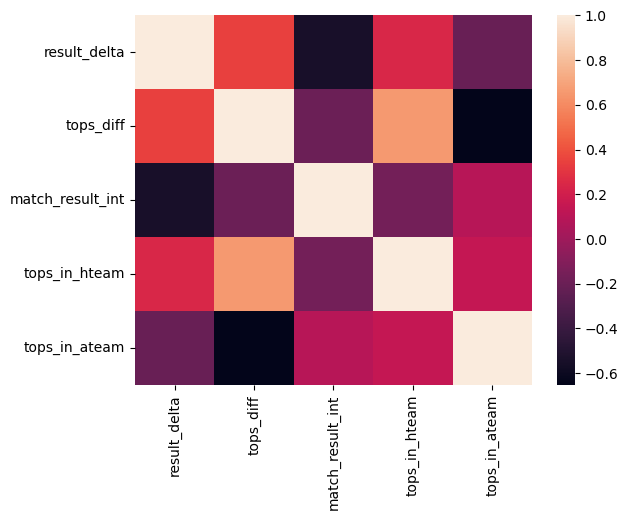

In [112]:
sns.heatmap(df_analysis[['result_delta','tops_diff','match_result_int','tops_in_hteam','tops_in_ateam']].corr(numeric_only = True))

<Axes: >

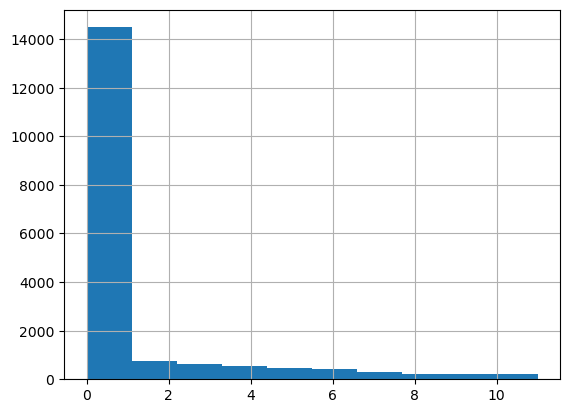

In [113]:
df_analysis['tops_in_hteam'].hist()

<Axes: >

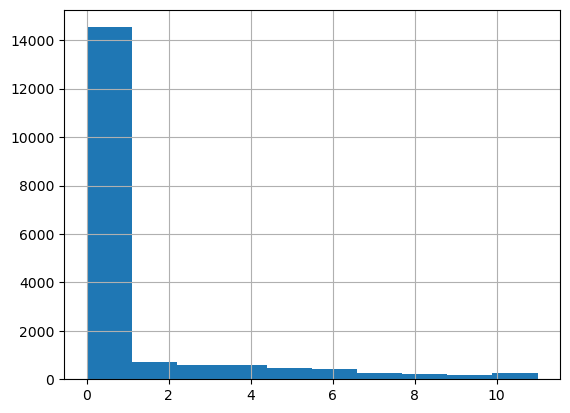

In [114]:
df_analysis['tops_in_ateam'].hist()

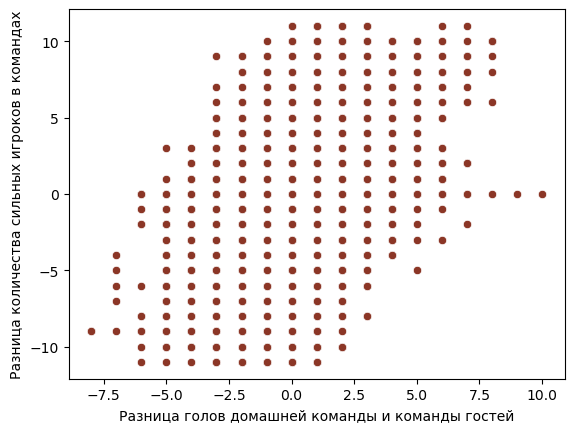

In [115]:
colors = ['#8B3626']
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data = df_analysis, x = 'result_delta', y = 'tops_diff')

plt.xlabel('Разница голов домашней команды и команды гостей')
plt.ylabel('Разница количества сильных игроков в командах')
plt.savefig("Scatter Plot of Tops")

Из графика видим совсем небольшую корреляцию. Если в домашней команде присутсвовали топовые игроки (tops_diff положительное), то и победа этих команд более вероятна (delta положительная), и наоборот. Если топовых игроков не было ни в одной команде (tops_diff = 0), то возможны были совершенно разные исходы матча.

Добавление именно этих коррелирующих колонок в основной df:

In [116]:
df['result_delta']=df['home_team_goal'] - df['away_team_goal'] #разница между голами команд
#(положительное - выигрыш дом. команды, отриц. - выигрыш гостей, 0 - ничья)
df['tops_diff']=df['tops_in_hteam'] - df['tops_in_ateam'] #разница между топами в командах

In [117]:
df.columns.values.tolist()

['id',
 'season',
 'stage',
 'date',
 'league_name',
 'match_result',
 'home_team_goal',
 'home_team_name',
 'away_team_goal',
 'away_team_name',
 'home_team_api_id',
 'home_buildUpPlaySpeed',
 'home_buildUpPlayPassing',
 'home_buildUpPlayPositioningClass',
 'home_chanceCreationPassing',
 'home_chanceCreationCrossing',
 'home_chanceCreationShooting',
 'home_chanceCreationPositioningClass',
 'home_defencePressure',
 'home_defenceAggression',
 'home_defenceTeamWidth',
 'home_defenceDefenderLineClass',
 'away_team_api_id',
 'away_buildUpPlaySpeed',
 'away_buildUpPlayPassing',
 'away_buildUpPlayPositioningClass',
 'away_chanceCreationPassing',
 'away_chanceCreationCrossing',
 'away_chanceCreationShooting',
 'away_chanceCreationPositioningClass',
 'away_defencePressure',
 'away_defenceAggression',
 'away_defenceTeamWidth',
 'away_defenceDefenderLineClass',
 'home_player_1',
 'home_player_2',
 'home_player_3',
 'home_player_4',
 'home_player_5',
 'home_player_6',
 'home_player_7',
 'home_pla

In [118]:
df.drop(columns = ['home_player_1',
 'home_player_2',
 'home_player_3',
 'home_player_4',
 'home_player_5',
 'home_player_6',
 'home_player_7',
 'home_player_8',
 'home_player_9',
 'home_player_10',
 'home_player_11',
 'away_player_1',
 'away_player_2',
 'away_player_3',
 'away_player_4',
 'away_player_5',
 'away_player_6',
 'away_player_7',
 'away_player_8',
 'away_player_9',
 'away_player_10',
 'away_player_11','home_player_1top',
 'home_player_2top',
 'home_player_3top',
 'home_player_4top',
 'home_player_5top',
 'home_player_6top',
 'home_player_7top',
 'home_player_8top',
 'home_player_9top',
 'home_player_10top',
 'home_player_11top',
 'away_player_1top',
 'away_player_2top',
 'away_player_3top',
 'away_player_4top',
 'away_player_5top',
 'away_player_6top',
 'away_player_7top',
 'away_player_8top',
 'away_player_9top',
 'away_player_10top',
 'away_player_11top',],inplace = True)

# Гипотеза № 4
## Если у команды высокие показатели, много побед за разные сезоны (от сезона к сезону), то такая команда чаще одерживает победу.

In [119]:
pd.set_option('display.max_columns', None)

In [120]:
df.head(5)

id     season  stage  date             league_name match_result  \
0  377  2009/2010     19  2010  Belgium Jupiler League     home win   
1  379  2009/2010     19  2010  Belgium Jupiler League     away win   
2  382  2009/2010     19  2010  Belgium Jupiler League     home win   
3  405  2009/2010     22  2010  Belgium Jupiler League     home win   
4  406  2009/2010     22  2010  Belgium Jupiler League     away win   

   home_team_goal home_team_name  away_team_goal away_team_name  \
0               3            AND               2            CLB   
1               2            CHA               3            STL   
2               1            MEC               0            BAC   
3               2            CLB               1            WES   
4               0            STL               4            AND   

   home_team_api_id  home_buildUpPlaySpeed  home_buildUpPlayPassing  \
0              8635                   50.0                     35.0   
1              9986                   40.0                     50.0   
2              8203                   65.0                     60.0   
3              8342                   35.0                     40.0   
4              9985                   53.0                     40.0   

   home_buildUpPlayPositioningClass  home_chanceCreationPassing  \
0                               1.0                        70.0   
1                               1.0                        45.0   
2                               1.0                        50.0   
3                               1.0                        45.0   
4                               1.0                        55.0   

   home_chanceCreationCrossing  home_chanceCreationShooting  \
0                         50.0                         60.0   
1                         43.0                         60.0   
2                         40.0                         50.0   
3                         50.0                         45.0   
4                         55.0                         65.0   

   home_chanceCreationPositioningClass  home_defencePressure  \
0                                  2.0                  70.0   
1                                  2.0                  70.0   
2                                  2.0                  60.0   
3                                  2.0                  60.0   
4                                  2.0                  70.0   

   home_defenceAggression  home_defenceTeamWidth  \
0                    50.0                   70.0   
1                    70.0                   70.0   
2                    70.0                   60.0   
3                    70.0                   70.0   
4                    70.0                   65.0   

   home_defenceDefenderLineClass  away_team_api_id  away_buildUpPlaySpeed  \
0                            1.0              8342                   35.0   
1                            1.0              9985                   53.0   
2                            1.0              9993                   35.0   
3                            1.0             10001                   45.0   
4                            1.0              8635                   50.0   

   away_buildUpPlayPassing  away_buildUpPlayPositioningClass  \
0                     40.0                               1.0   
1                     40.0                               1.0   
2                     35.0                               1.0   
3                     60.0                               1.0   
4                     35.0                               1.0   

   away_chanceCreationPassing  away_chanceCreationCrossing  \
0                        45.0                         50.0   
1                        55.0                         55.0   
2                        45.0                         40.0   
3                        40.0                         45.0   
4                        70.0                         50.0   

   away_chanceCreationShooting  away_chanceCre

Как было установлено ранее, команда, играющая на домашнем поле одержживает победу чаще

In [121]:
home_win=int(round(df[df['match_result']=='home win'].shape[0]/len(df)*100, 0))
away_win=int(round(df[df['match_result']=='away win'].shape[0]/len(df)*100, 0))
draw=int(round(df[df['match_result']=='draw'].shape[0]/len(df)*100, 0))

result=pd.DataFrame({'wins':['home win', 'away win', 'draw'], 'score':(home_win, away_win, draw)})

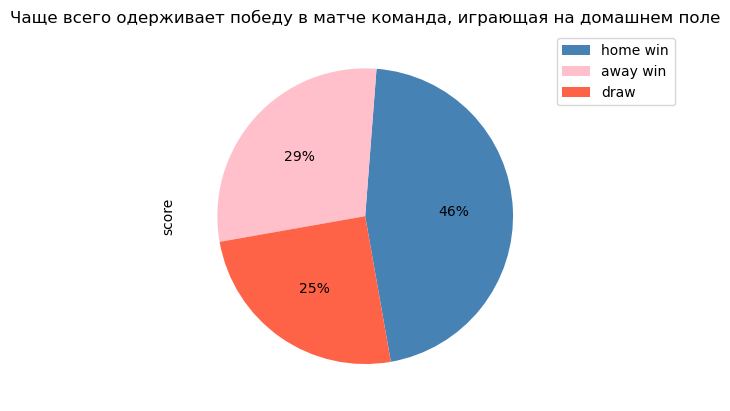

In [122]:
result.plot(kind='pie', x='wins', y='score' , autopct='%1.0f%%',
                                    colors = ['steelblue', 'pink', 'tomato'],
                                    startangle=280,
                                    labels=None,
                                    title='Чаще всего одерживает победу в матче команда, играющая на домашнем поле')
plt.legend(result['wins'], bbox_to_anchor=(1, 1))

Попробуем разобраться почему это происходит.
Посмотрим как связано количество побед и проигрышей с командными показателями.

Построим матрицу корреляции командных показателей и результата матча


In [123]:
home_col= ['home_buildUpPlaySpeed', 'home_buildUpPlayPassing',
       'home_buildUpPlayPositioningClass', 'home_chanceCreationPassing',
       'home_chanceCreationCrossing', 'home_chanceCreationShooting',
       'home_chanceCreationPositioningClass', 'home_defencePressure',
       'home_defenceAggression', 'home_defenceTeamWidth',
       'home_defenceDefenderLineClass']
away_col=['away_buildUpPlaySpeed', 'away_buildUpPlayPassing',
       'away_buildUpPlayPositioningClass', 'away_chanceCreationPassing',
       'away_chanceCreationCrossing', 'away_chanceCreationShooting',
       'away_chanceCreationPositioningClass', 'away_defencePressure',
       'away_defenceAggression', 'away_defenceTeamWidth',
       'away_defenceDefenderLineClass']

In [124]:
corr=df[['wins_home', 'wins_away'] + home_col + away_col].corr()

<Axes: >

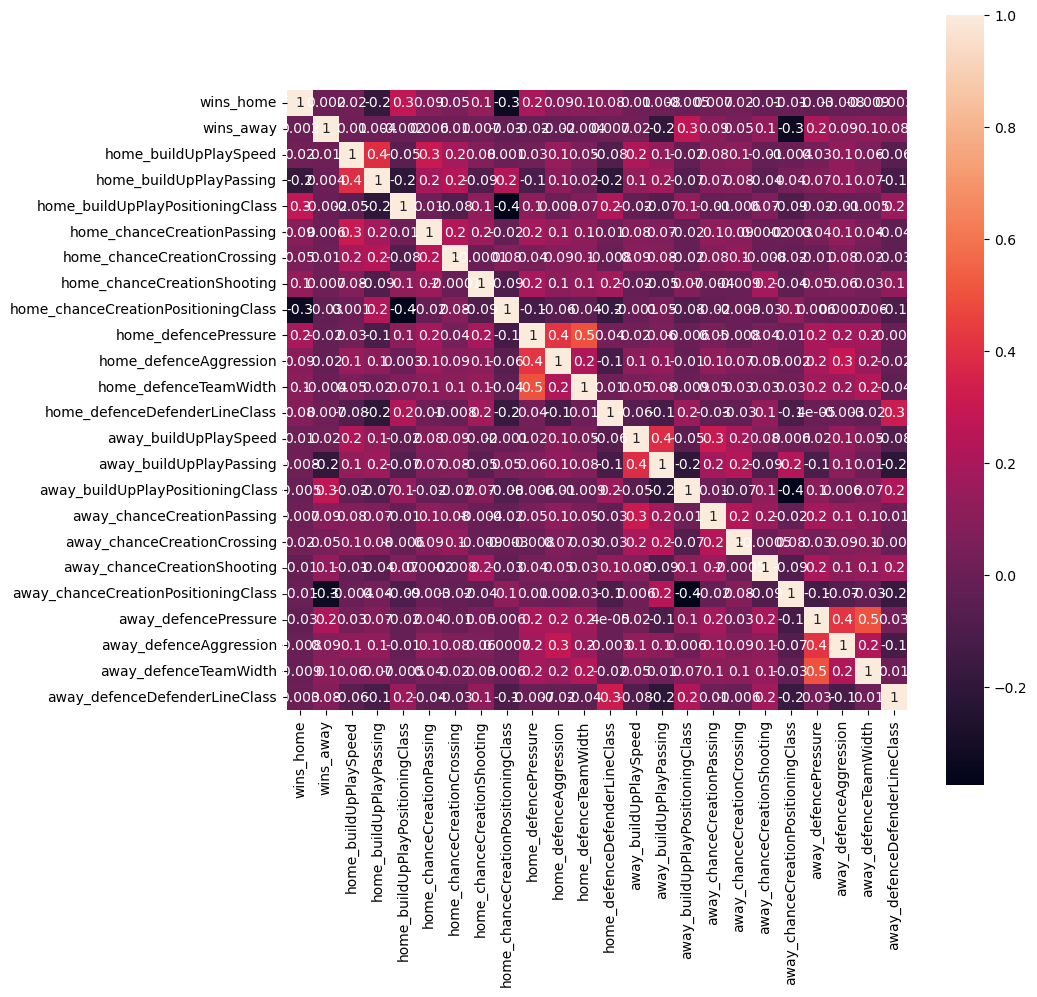

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, fmt='.1g', square=True)

На данный момент корреляции тактики команды с резутатом матча нет. При этом видна средняя корреляция по тактике команды в нападении и защите, независимо от того, на чьем поле проходила игра.


Коррелирующие командные показатели:


defencePressure - прессинг в обороне;

defenceTeamWidth - ширина расположения команды в защите;

defenceAggression - агрессивность в обороне;


buildUpPlaySpeed - скорость атаки команды;

buildUpPlayPassing - уровень передач в атаке


Проверим как связана корреляция с победой и проирышем в матче команд на домашнем поле.
Сравним отдельно тактику игры домашней команды и гостей.

Создадим два датасета для анализа игры на домашнем и выездных полях

In [126]:
home_tactics1 = df.groupby('date')[['home_buildUpPlaySpeed', 'home_buildUpPlayPassing', 'home_chanceCreationPassing',
       'home_chanceCreationCrossing', 'home_chanceCreationShooting', 'home_defencePressure',
       'home_defenceAggression', 'home_defenceTeamWidth']].agg('mean')

home_tactics2=df.groupby('date')[['home_buildUpPlayPositioningClass','home_defenceDefenderLineClass','home_chanceCreationPositioningClass']].agg('mean')

away_tactics1 = df.groupby('date')[['away_buildUpPlaySpeed', 'away_buildUpPlayPassing', 'away_chanceCreationPassing',
       'away_chanceCreationCrossing', 'away_chanceCreationShooting', 'away_defencePressure',
       'away_defenceAggression', 'away_defenceTeamWidth']].agg('mean')
away_tactics2=df.groupby('date')[['away_buildUpPlayPositioningClass', 'away_chanceCreationPositioningClass', 'away_defenceDefenderLineClass']].agg('mean')

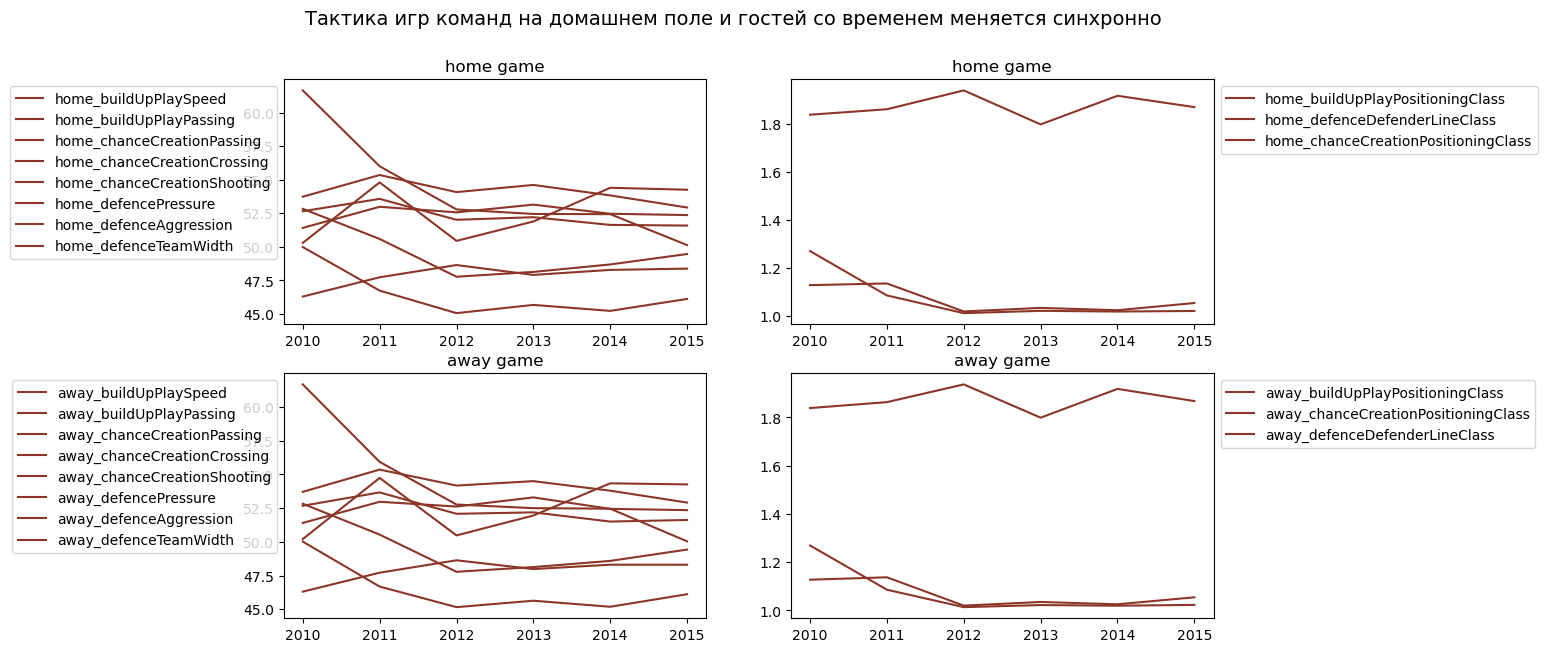

In [127]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 7))
fig.suptitle('Тактика игр команд на домашнем поле и гостей со временем меняется синхронно', fontsize=14)

ax1.plot(home_tactics1)
ax1.legend(home_tactics1,  bbox_to_anchor=(0, 1))
ax1.title.set_text('home game')


ax2.plot(home_tactics2)
ax2.legend(home_tactics2,  bbox_to_anchor=(1, 1))
ax2.title.set_text('home game')

ax3.plot(away_tactics1)
ax3.legend(away_tactics1,  bbox_to_anchor=(0, 1))
ax3.title.set_text('away game')

ax4.plot(away_tactics2)
ax4.legend(away_tactics2,  bbox_to_anchor=(1, 1))
ax4.title.set_text('away game')
plt.show()

Из графиков видно, что тактики ведения игр из года в год меняются, но изменения происходят синхронно на обоих полях по каждому показателю. Командные показатели по каждой тактике на домашнем поле и выездном находятся в тех же числовых диапазонах. Связи тактики ведения игры и преимущества в счете домашней команды  на графике не обнаружено.

In [128]:
home_game = df[['home_team_api_id','home_team_name', 'date', 'league_name' , 'match_result', 'wins_home', 'wins_away',
       'home_team_goal', 'away_team_goal'] + home_col]

In [129]:
home_stat=home_game.groupby(['home_team_api_id'])[['home_team_goal', 'away_team_goal', 'wins_home', 'wins_away']  + home_col].mean().reset_index()
home_stat=home_stat.sort_values(['home_team_goal', 'away_team_goal'], ascending=[False, True])

<Axes: >

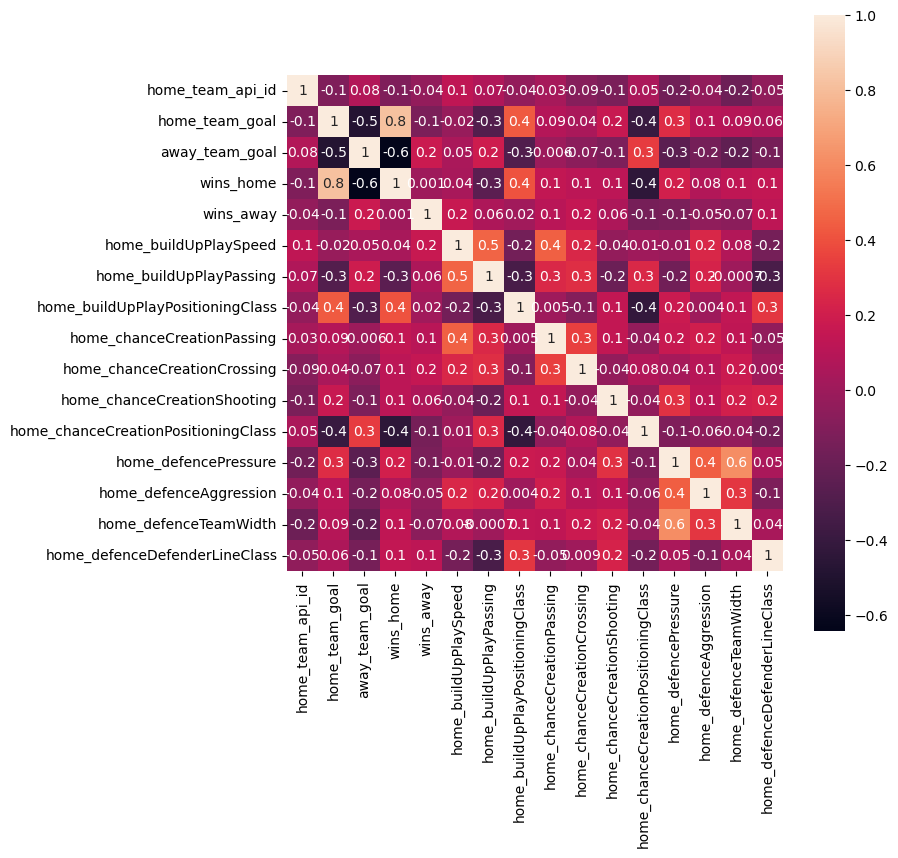

In [130]:
plt.figure(figsize=(8,8))
sns.heatmap(home_stat.corr(),annot = True, fmt='.1g', square=True)

Из рассматриваемых командных показателей на победу в матче на домашнем поле больше всего влияет, согласно корреляции, расположение команды в нападении (buildUpPlayPositioningClass). Но данная корелляция является средней (0.4), из чего можно предположить, что данный показатель не является определяющием критерием в преимуществе голов на домашнем поле.

Также имеется средняя корреляция между активным нападением на игроков из другой команды, владеющих мячом (defencePressure) и шириной расположения команды в защите (defenceTeamWidth).



Теперь посмотриим как командные показатели влияют на результат матча на поле соперника

In [131]:
away_game=df[['season', 'stage', 'date', 'league_name', 'match_result', 'wins_home', 'wins_away','away_team_api_id',
       'home_team_goal', 'home_team_name', 'away_team_goal', 'away_team_name'] + away_col]

In [132]:
away_stat=round(away_game.groupby('away_team_api_id')[['away_team_goal','home_team_goal', 'wins_home', 'wins_away'] +away_col].mean(), 2).reset_index()
away_stat=away_stat.sort_values(['away_team_goal', 'home_team_goal'], ascending=[False, True])

<Axes: >

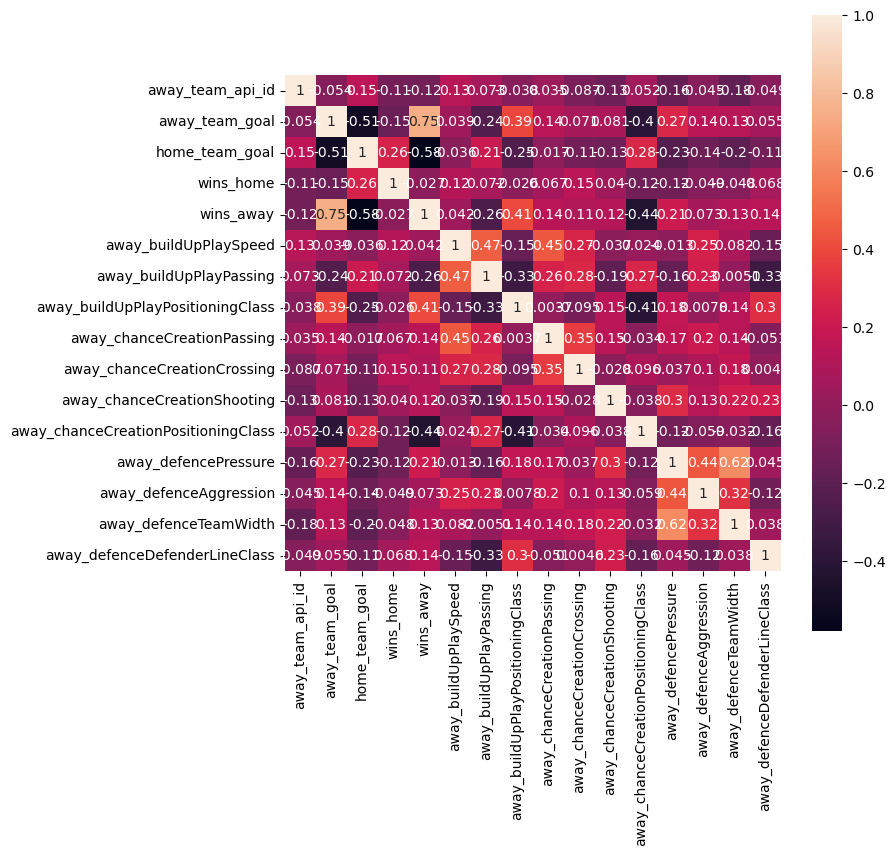

In [133]:
plt.figure(figsize=(8,8))
sns.heatmap(away_stat.corr(),annot = True, fmt='.2g', square=True)

На выездном поле наблюдается такая же тенденция как и на домашнем поле.
Победу гостей в матче из рассматриеваемых показателей также сильнее всего влияет расположение команды при создании голевых моментов и прессинг в обороне(defencePressure).

В равной степени наблюдается средняя корреляция между голами забитыми гостями, расположением гостевой команды в нападении (buildUpPlayPositioningClass) и расположением команды при создании голевых моментов (chanceCreationPositioningClass). Коэффициент корреляции является средней и составляет 0.4.
Рассмотрев корреляцию по остальным командным показателям, можно предположить, что уровень и тактика игры команды гостей в отношении ее расположения в нападениии и при создании голевых моментов могут влиять на исход матча.




Посмотрим как связано расположение команды в нападении и расположение гостевой команды в нападении с победой гостей на поле

In [134]:
away_stat[['home_team_goal','away_team_goal','wins_home','wins_away', 'away_chanceCreationPositioningClass', 'away_buildUpPlayPositioningClass']].describe()

home_team_goal  away_team_goal   wins_home   wins_away  \
count      279.000000      279.000000  279.000000  279.000000   
mean         1.626774        1.069821   66.848351   48.799283   
std          0.360523        0.330262   10.383012   38.476507   
min          0.740000        0.260000   33.500000    1.000000   
25%          1.410000        0.845000   62.260000   16.500000   
50%          1.620000        1.010000   70.180000   43.000000   
75%          1.845000        1.240000   73.890000   73.000000   
max          3.000000        2.330000  101.380000  178.000000   

       away_chanceCreationPositioningClass  away_buildUpPlayPositioningClass  
count                           279.000000                        279.000000  
mean                              1.902903                          1.049570  
std                               0.205147                          0.135548  
min                               1.000000                          1.000000  
25%                               1.860000                          1.000000  
50%                               2.000000                          1.000000  
75%                               2.000000                          1.000000  
max                               2.000000                          2.000000

Среднее значение по показателю расположения команды при создании голевых моментов составляет 1.9.
Это значит, что в основном команда гостей придерживается организованного расположения, нежели свободного.

Среднее значение по показателю расположения гостевой команды в нападении сотставляет 1. Это значит, что в основном команда гостей придерживается организованного расположения на поле, нежели свободного.
Данная статистика может быть случайной, требует дополнительного анализа.
 Малопероятно, что тактика команды меняется в зависимости от поля, на котором играет команда. Поэтому сначала проверим эти же показатели на домашнем поле.

In [135]:
home_stat[['home_team_goal','away_team_goal','wins_home','wins_away', 'home_chanceCreationPositioningClass', 'home_buildUpPlayPositioningClass']].describe()

home_team_goal  away_team_goal   wins_home   wins_away  \
count      279.000000      279.000000  279.000000  279.000000   
mean         1.411043        1.249897   48.799283   66.647908   
std          0.441802        0.320737   38.476507   10.039000   
min          0.333333        0.400000    1.000000   43.214286   
25%          1.123350        1.049043   16.500000   61.180000   
50%          1.339286        1.229167   43.000000   70.000000   
75%          1.603922        1.436508   73.000000   73.867481   
max          3.365217        2.210526  178.000000   86.000000   

       home_chanceCreationPositioningClass  home_buildUpPlayPositioningClass  
count                           279.000000                        279.000000  
mean                              1.902614                          1.049078  
std                               0.205321                          0.135134  
min                               1.000000                          1.000000  
25%                               1.866169                          1.000000  
50%                               2.000000                          1.000000  
75%                               2.000000                          1.000000  
max                               2.000000                          2.000000

Как видно, данная тенденция имеется и на домашнем поле.

Поэтому рассмотрим данные показатели относительно команд - рассмотрим влияние командных показатели на победу в матче


Разделим на два датафрейма, сгруппируем по командам, приведем к общему виду и  объединим данные по командам

In [136]:
home_team1=home_game.groupby(['home_team_api_id','home_team_name', 'league_name'])[['home_team_goal','away_team_goal']].sum()
home_team2=round(home_game.groupby(['home_team_api_id','home_team_name', 'league_name'])[['wins_home','wins_away'] + home_col].mean(),1)
home_team = home_team1.join(home_team2, how='inner').reset_index()

In [137]:
away_team1=away_game.groupby(['away_team_api_id','away_team_name', 'league_name'])[['home_team_goal','away_team_goal']].sum()
away_team2=round(away_game.groupby(['away_team_api_id','away_team_name', 'league_name'])[['wins_home','wins_away'] + away_col].mean(),1)
away_team = away_team1.join(away_team2, how='inner').reset_index()

In [138]:
home_team.rename(columns ={'home_team_api_id':'team_api_id',
                           'home_team_name': 'team_name',
                           'home_team_goal': 'win',
                           'away_team_goal' : 'lose',
                            'wins_home' : 'avg_wins_home',
                           'wins_away' : 'avg_wins_away'}, inplace = True )

In [139]:
away_team.rename(columns ={'away_team_api_id':'team_api_id',
                           'away_team_name': 'team_name',
                            'away_team_goal': 'win',
                           'home_team_goal' : 'lose',
                           'wins_home' : 'avg_wins_home',
                           'wins_away' : 'avg_wins_away'}, inplace = True)

In [140]:
#переименовывание столбцов
def replace_text_in_df_name(dataframe, text):
    new_columns = dataframe.columns.str.replace(text, '')
    dataframe.columns = new_columns
    return dataframe

In [141]:
replace_text_in_df_name(home_team, 'home_')

team_api_id team_name               league_name  win  lose  \
0           1601       CHO        Poland Ekstraklasa  102    88   
1           1773       O-H    Belgium Jupiler League   29    35   
2           1957       BIA        Poland Ekstraklasa  125    83   
3           2033       OLH  Portugal Liga ZON Sagres   57    76   
4           2182       POZ        Poland Ekstraklasa  148    59   
..           ...       ...                       ...  ...   ...   
274        10281       VAL           Spain LIGA BBVA   57    62   
275       108893       ARL            France Ligue 1   14    31   
276       158085       ARO  Portugal Liga ZON Sagres   35    42   
277       208931       CAP             Italy Serie A    7    11   
278       274581       MOP    Belgium Jupiler League   14    23   

     avg_wins_home  avg_wins_away  buildUpPlaySpeed  buildUpPlayPassing  \
0             63.0           48.8              47.2                46.4   
1              8.0           45.4              52.0                50.0   
2             62.0           49.3              46.8                52.8   
3             28.0           60.5              49.5                49.4   
4             83.0           47.0              60.0                49.0   
..             ...            ...               ...                 ...   
274           22.0           81.4              55.0                50.9   
275            3.0           71.6              50.0                65.0   
276           16.0           58.9              66.9                39.0   
277            2.0           85.0              80.0                65.0   
278            5.0           43.2              50.0                50.0   

     buildUpPlayPositioningClass  chanceCreationPassing  \
0                            1.0                   56.0   
1                            1.0                   50.0   
2                            1.0                   50.7   
3                            1.0                   51.7   
4                            1.2                   57.0   
..                           ...                    ...   
274                          1.0                   55.1   
275                          1.0                   32.4   
276                          1.0                   55.0   
277                          1.0                   70.0   
278                          1.0                   50.0   

     chanceCreationCrossing  chanceCreationShooting  \
0                      60.7                    53.4   
1                      53.0                    54.0   
2                      36.6                    66.9   
3                      44.8                    48.7   
4                      56.6                    68.1   
..                      ...                     ...   
274                    62.2                    45.3   
275                    35.0                    32.4   
276                    59.0                    46.0   
277                    40.0                    50.0   
278                    50.0                    50.0   

     chanceCreationPositioningClass  defencePressure  defenceAggression  \
0                               2.0             47.1               47.4   
1                               2.0             43.0               44.0   
2                               2.0             48.6               56.3   
3                               1.3             42.7               34.8   
4                               1.8             52.2               48.2   
..                              ...              ...                ...   
274                             2.0             46.3               53.4   
275                             2.0             27.6               47.6   
276                             2.0             36.1               38.1   
277                             2.0             25.0               55.0   
278                             2.0             45.0               45.0   

     defenceTeamWidth  defen

In [142]:
replace_text_in_df_name(away_team, 'away_')

team_api_id team_name               league_name  lose  win  \
0           1601       CHO        Poland Ekstraklasa   115   98   
1           1773       O-H    Belgium Jupiler League    38   22   
2           1957       BIA        Poland Ekstraklasa   129   81   
3           2033       OLH  Portugal Liga ZON Sagres   101   58   
4           2182       POZ        Poland Ekstraklasa    82   91   
..           ...       ...                       ...   ...  ...   
274        10281       VAL           Spain LIGA BBVA    92   45   
275       108893       ARL            France Ligue 1    39    7   
276       158085       ARO  Portugal Liga ZON Sagres    44   24   
277       208931       CAP             Italy Serie A    22    8   
278       274581       MOP    Belgium Jupiler League    26   14   

     avg_wins_home  avg_wins_away  buildUpPlaySpeed  buildUpPlayPassing  \
0             47.8           63.0              47.3                46.5   
1             43.7            8.0              52.0                50.0   
2             49.2           62.0              47.4                53.6   
3             62.6           28.0              48.8                49.1   
4             47.5           83.0              60.4                49.0   
..             ...            ...               ...                 ...   
274           77.1           22.0              55.0                50.6   
275           71.6            3.0              50.0                65.0   
276           53.7           16.0              66.9                39.0   
277           52.9            2.0              80.0                65.0   
278           52.9            5.0              50.0                50.0   

     buildUpPlayPositioningClass  chanceCreationPassing  \
0                            1.0                   55.2   
1                            1.0                   50.0   
2                            1.0                   50.8   
3                            1.0                   51.7   
4                            1.2                   57.0   
..                           ...                    ...   
274                          1.0                   54.9   
275                          1.0                   32.6   
276                          1.0                   55.0   
277                          1.0                   70.0   
278                          1.0                   50.0   

     chanceCreationCrossing  chanceCreationShooting  \
0                      60.2                    53.6   
1                      53.0                    54.0   
2                      36.8                    67.1   
3                      44.8                    47.9   
4                      57.5                    68.0   
..                      ...                     ...   
274                    61.7                    45.6   
275                    35.0                    32.6   
276                    59.0                    46.0   
277                    40.0                    50.0   
278                    50.0                    50.0   

     chanceCreationPositioningClass  defencePressure  defenceAggression  \
0                               2.0             47.3               47.5   
1                               2.0             43.0               44.0   
2                               2.0             48.8               56.3   
3                               1.3             42.5               34.5   
4                               1.8             51.7               48.4   
..                              ...              ...                ...   
274                             2.0             46.0               53.6   
275                             2.0             27.4               47.4   
276                             2.0             36.0               38.0   
277                             2.0             25.0               55.0   
278                             2.0             45.0               45.0   

     defenceTeamWidth  defen

In [143]:
team_concat= pd.concat([home_team, away_team])

In [144]:
team_scores=team_concat.groupby(['team_api_id', 'team_name', 'league_name'])[['win', 'lose', 'avg_wins_home','avg_wins_away', 'buildUpPlaySpeed', 'buildUpPlayPassing', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'chanceCreationPositioningClass',
       'defencePressure', 'defenceAggression', 'defenceTeamWidth',
       'defenceDefenderLineClass']].mean().reset_index()

In [145]:
team_scores.head()

team_api_id team_name               league_name    win   lose  \
0         1601       CHO        Poland Ekstraklasa  100.0  101.5   
1         1773       O-H    Belgium Jupiler League   25.5   36.5   
2         1957       BIA        Poland Ekstraklasa  103.0  106.0   
3         2033       OLH  Portugal Liga ZON Sagres   57.5   88.5   
4         2182       POZ        Poland Ekstraklasa  119.5   70.5   

   avg_wins_home  avg_wins_away  buildUpPlaySpeed  buildUpPlayPassing  \
0          55.40          55.90             47.25               46.45   
1          25.85          26.70             52.00               50.00   
2          55.60          55.65             47.10               53.20   
3          45.30          44.25             49.15               49.25   
4          65.25          65.00             60.20               49.00   

   buildUpPlayPositioningClass  chanceCreationPassing  chanceCreationCrossing  \
0                          1.0                  55.60                   60.45   
1                          1.0                  50.00                   53.00   
2                          1.0                  50.75                   36.70   
3                          1.0                  51.70                   44.80   
4                          1.2                  57.00                   57.05   

   chanceCreationShooting  chanceCreationPositioningClass  defencePressure  \
0                   53.50                             2.0            47.20   
1                   54.00                             2.0            43.00   
2                   67.00                             2.0            48.70   
3                   48.30                             1.3            42.60   
4                   68.05                             1.8            51.95   

   defenceAggression  defenceTeamWidth  defenceDefenderLineClass  
0              47.45             49.35                       1.0  
1              44.00             50.00                       1.0  
2              56.30             53.80                       1.0  
3              34.65             45.70                       1.0  
4              48.30             54.05                       1.0

<Axes: >

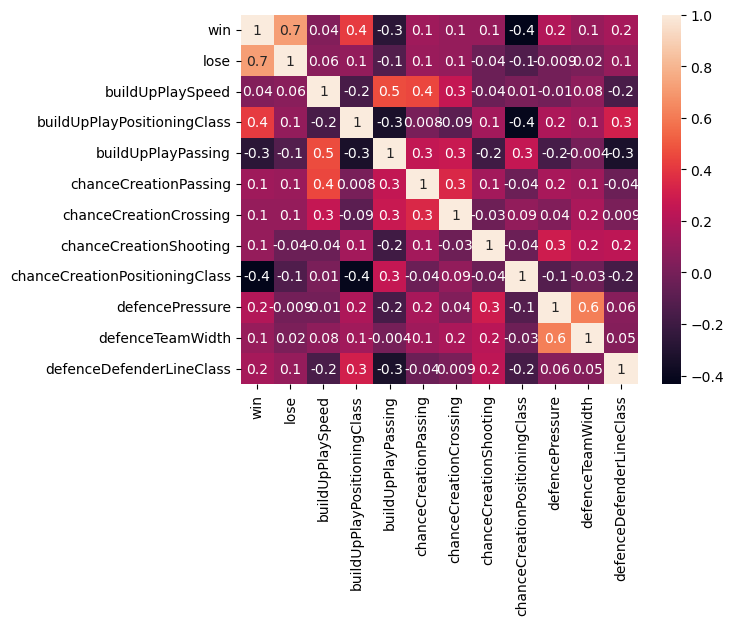

In [146]:
sns.heatmap(team_scores[['win', 'lose','buildUpPlaySpeed', 'buildUpPlayPositioningClass',
       'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'chanceCreationPositioningClass', 'defencePressure',
       'defenceTeamWidth', 'defenceDefenderLineClass']].corr(),annot = True, fmt='.1g', square=False)

В основном, в данном графике сохраняется корреляция, которая была уже выявлена при рассмотрении команд относительно поля.
Наблюдается связь(корреляция 0.4) победы в матче от уже рассматриваемых ранее характеристик:расположение команды в нападении (buildUpPlayPositioningClass) и расположение команды при создании голевых моментов (chanceCreationPositioningClass). К анализу командных показателей мы еще вернемся

Проверим насколько лига влияет на исход матча

In [147]:
league_home_game=pd.pivot_table(df, columns='league_name',
                                   values='home_team_goal',
                                   index='date',
                                   aggfunc='sum')

league_away_game=pd.pivot_table(df, columns='league_name',
                                   values='away_team_goal',
                                   index='date',
                                   aggfunc='sum')

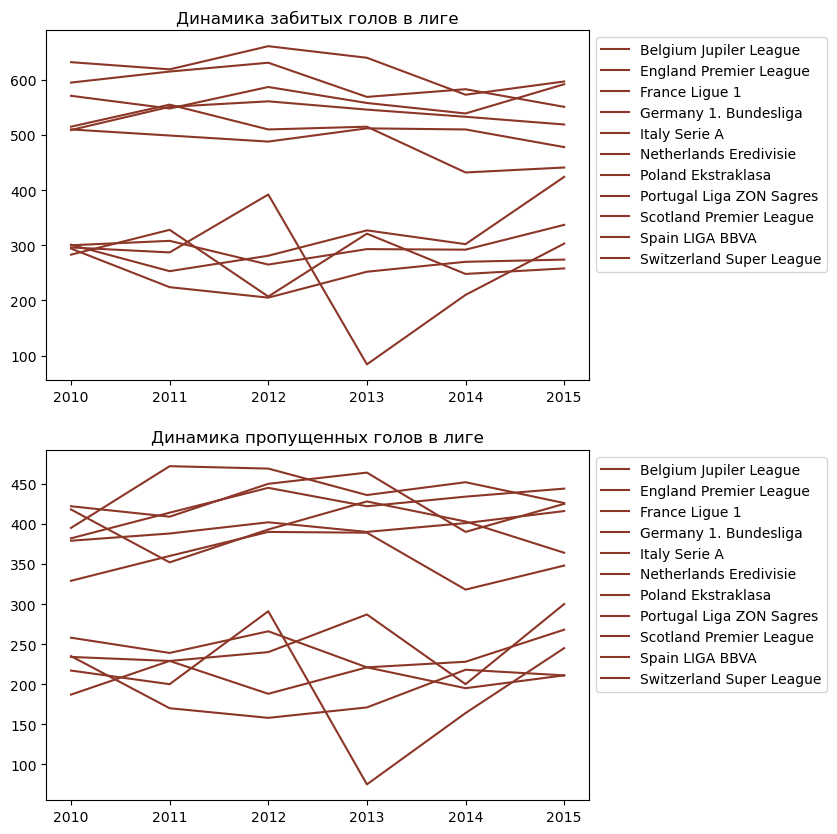

In [148]:
fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(7, 10))

ax1.plot(league_home_game)
ax1.legend(league_home_game,  bbox_to_anchor=(1, 1))
ax1.title.set_text('Динамика забитых голов в лиге')

ax2.plot(league_away_game)
ax2.legend(league_away_game,  bbox_to_anchor=(1, 1))
ax2.title.set_text("Динамика пропущенных голов в лиге")

По данным графикам видно, что тактика ведения игры у команд на домашней и выездном поле меняется синхронно. Что также не объясняет победу игроков на домашнем поле

In [149]:
league_stat=df.groupby(['league_name'])[['home_team_goal', 'away_team_goal']].sum().reset_index()

Количество голов в зависимости от лиги меняется.
Средний разрыв по голам сохраняется независимо от лиги

In [150]:
league_stat.sort_values(['home_team_goal', 'away_team_goal'], ascending=[False, False])

league_name  home_team_goal  away_team_goal
9            Spain LIGA BBVA            3722            2560
1     England Premier League            3544            2650
4              Italy Serie A            3395            2541
2             France Ligue 1            3219            2376
3      Germany 1. Bundesliga            2997            2358
5     Netherlands Eredivisie            2968            2134
7   Portugal Liga ZON Sagres            1888            1490
8    Scotland Premier League            1795            1480
6         Poland Ekstraklasa            1645            1231
0     Belgium Jupiler League            1572            1192
10  Switzerland Super League            1519            1163

Посмотрим как это связано с количеством проходящих матчей в лиге

In [151]:
league_matches=df.groupby('league_name')['id'].count()
league_matches.sort_values(ascending= False)

league_name
Spain LIGA BBVA             2299
France Ligue 1              2283
England Premier League      2274
Italy Serie A               2260
Germany 1. Bundesliga       1836
Netherlands Eredivisie      1612
Portugal Liga ZON Sagres    1317
Scotland Premier League     1238
Poland Ekstraklasa          1180
Belgium Jupiler League      1005
Switzerland Super League     939
Name: id, dtype: int64

В общем и целом, количество забитых голов коррелируется с количеством пройденных матчей.

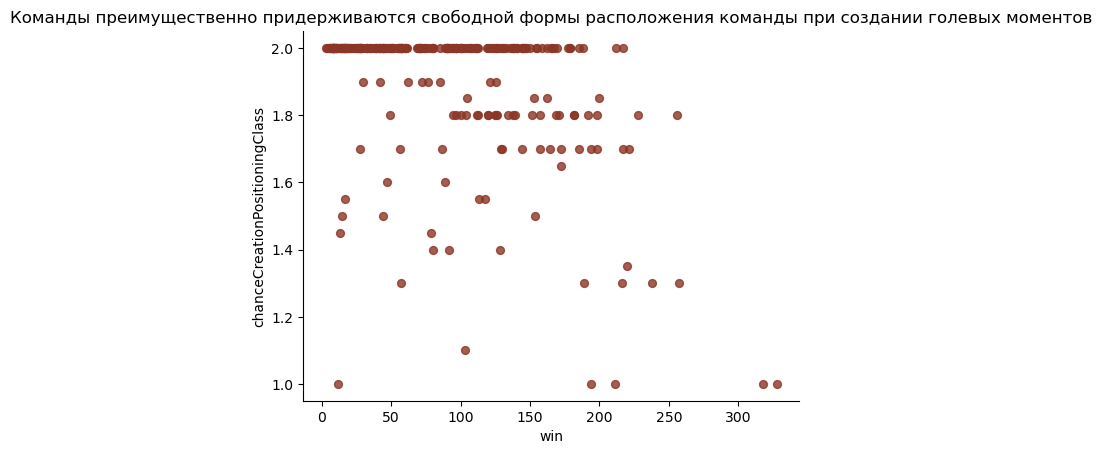

In [152]:
team_scores.plot(kind='scatter', x='win', y='chanceCreationPositioningClass', s=32, alpha=.8, title="Команды преимущественно придерживаются свободной формы расположения команды при создании голевых моментов")
plt.gca().spines[['top', 'right']].set_visible(False)


Рассмотрим разницу в командных показателях победителей и проигравших

In [153]:
team_scores[['win', 'lose', 'avg_wins_home','avg_wins_away','chanceCreationPositioningClass', 'buildUpPlayPositioningClass','buildUpPlaySpeed',
       'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'chanceCreationPositioningClass', 'defencePressure',
       'defenceTeamWidth', 'defenceDefenderLineClass']].describe()

win        lose  avg_wins_home  avg_wins_away  \
count  279.000000  279.000000     279.000000     279.000000   
mean    88.600358   88.600358      57.823118      57.723297   
std     63.672419   46.124819      19.791806      19.889455   
min      3.000000    5.500000      17.250000      24.100000   
25%     32.750000   50.250000      41.950000      42.025000   
50%     80.500000   88.500000      54.750000      55.000000   
75%    129.750000  127.250000      70.450000      69.875000   
max    327.500000  186.000000     125.300000     123.350000   

       chanceCreationPositioningClass  buildUpPlayPositioningClass  \
count                      279.000000                   279.000000   
mean                         1.901254                     1.050179   
std                          0.206696                     0.135611   
min                          1.000000                     1.000000   
25%                          1.900000                     1.000000   
50%                          2.000000                     1.000000   
75%                          2.000000                     1.000000   
max                          2.000000                     2.000000   

       buildUpPlaySpeed  buildUpPlayPassing  chanceCreationPassing  \
count        279.000000          279.000000             279.000000   
mean          52.347849           48.771505              51.962186   
std            8.792988            8.345475               7.297938   
min           29.300000           29.700000              30.000000   
25%           47.100000           43.100000              47.650000   
50%           52.400000           48.300000              52.000000   
75%           58.100000           53.350000              55.675000   
max           80.000000           77.000000              71.400000   

       chanceCreationCrossing  chanceCreationShooting  \
count              279.000000              279.000000   
mean                53.482258               54.115771   
std                  8.354927                6.755861   
min                 30.000000               32.500000   
25%                 48.400000               49.950000   
50%                 53.850000               53.800000   
75%                 59.075000               58.725000   
max                 77.000000               72.150000   

       chanceCreationPositioningClass  defencePressure  defenceTeamWidth  \
count                      279.000000       279.000000        279.000000   
mean                         1.901254        46.108244         51.968280   
std                          0.206696         7.879378          6.953854   
min                          1.000000        25.000000         30.000000   
25%                          1.900000        41.075000         47.525000   
50%                          2.000000        45.550000         52.000000   
75%                          2.000000        50.900000         56.075000   
max                          2.000000        70.000000         70.000000   

       defenceDefenderLineClass  
count                279.000000  
mean                   1.064695  
std                    0.144500  
min                    1.000000  
25%                    1.000000  
50%                    1.000000  
75%                    1.000000  
max                    2.000000

In [154]:
team_win=round(team_scores.query('win>lose')[['chanceCreationPositioningClass', 'buildUpPlayPositioningClass','buildUpPlaySpeed',
       'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'chanceCreationPositioningClass', 'defencePressure',
       'defenceTeamWidth', 'defenceDefenderLineClass']].mean(),2)

In [155]:
team_lose=round(team_scores.query('win<lose')[['chanceCreationPositioningClass', 'buildUpPlayPositioningClass','buildUpPlaySpeed',
       'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'chanceCreationPositioningClass', 'defencePressure',
       'defenceTeamWidth', 'defenceDefenderLineClass']].mean(), 2)

In [156]:
team_win

chanceCreationPositioningClass     1.78
buildUpPlayPositioningClass        1.12
buildUpPlaySpeed                  52.55
buildUpPlayPassing                46.06
chanceCreationPassing             52.38
chanceCreationCrossing            54.85
chanceCreationShooting            55.46
chanceCreationPositioningClass     1.78
defencePressure                   48.86
defenceTeamWidth                  52.90
defenceDefenderLineClass           1.08
dtype: float64

In [157]:
team_lose

chanceCreationPositioningClass     1.95
buildUpPlayPositioningClass        1.02
buildUpPlaySpeed                  52.22
buildUpPlayPassing                49.77
chanceCreationPassing             51.78
chanceCreationCrossing            52.95
chanceCreationShooting            53.62
chanceCreationPositioningClass     1.95
defencePressure                   45.04
defenceTeamWidth                  51.59
defenceDefenderLineClass           1.06
dtype: float64

In [158]:
team_delta=team_win-team_lose

In [159]:
team_delta=abs(round(team_delta, 1)).sort_values(ascending= False)

In [160]:
team_delta

defencePressure                   3.8
buildUpPlayPassing                3.7
chanceCreationCrossing            1.9
chanceCreationShooting            1.8
defenceTeamWidth                  1.3
chanceCreationPassing             0.6
buildUpPlaySpeed                  0.3
chanceCreationPositioningClass    0.2
chanceCreationPositioningClass    0.2
buildUpPlayPositioningClass       0.1
defenceDefenderLineClass          0.0
dtype: float64

Несмотря, на то что корреляция не показала связи победы/проигрыша с прессингом в обороне (defencePressure) и уровнем передач в атаке (buildUpPlayPassing) между командами, которые чаще одерживают победу и проигравшими, имеется небольшая разница по этим показателям.

In [161]:
print(f'Разница показателей, которые, предположительно, могут повлиять на исход матча:\n'
f'Активное нападение на игроков другой команды, владеющих мячом(прессинг в обороне):  {team_delta.defencePressure}, \n'
f'Уровень передач в атаке: {team_delta.buildUpPlayPassing}, \n'
f'Расположение команды при создании голевых моментов: {team_delta.chanceCreationCrossing}')

Разница показателей, которые, предположительно, могут повлиять на исход матча:
Активное нападение на игроков другой команды, владеющих мячом(прессинг в обороне):  3.8, 
Уровень передач в атаке: 3.7, 
Расположение команды при создании голевых моментов: 1.9


Вывод: Выявлена небольшая связь победы команды и ее тактики в игре. На победу в матче, из рассматриваемых командных показателей, сильнее всего влияют следующие показатели:
активное нападение на игроков другой команды, владеющих мячом (прессинг в обороне),
уровень передач в атаке (buiUpPlayPassing),
расположение команды на поле - чем свободнее команда расположена при создании голевых моментов (chanceCreationPositioningClass=1), тем чаще она одерживает победу.
Учет данных показателей может быть преимуществом при определение победителя матча




In [162]:
df['home_tactics']=round((df['home_chanceCreationPositioningClass'] + df['home_buildUpPlayPassing'] + df['home_defencePressure']).mean(), 1)
df['away_tactics']=round((df['away_chanceCreationPositioningClass'] + df['away_buildUpPlayPassing'] + df['away_defencePressure']).mean(), 1)

In [163]:
df.to_csv('for_tableau_v1.csv')

### Логистическая регрессия

In [164]:
df['delta_score'] = df['avg_score_gap_home'] - df['avg_score_gap_away']
df['delta_buildUpClass'] = df['home_buildUpPlayPositioningClass'] - df['away_buildUpPlayPositioningClass']
df['delta_chanceCreationClass'] = df['home_chanceCreationPositioningClass'] - df['away_chanceCreationPositioningClass']
df['delta_defenceClass'] = df['home_defenceDefenderLineClass'] - df['away_defenceDefenderLineClass']

In [165]:
df_1 = df
df_1['match_result'].replace({'home win': 1,'away win': 0,'draw': 2}, inplace=True)
df_1 = df[(df['date']==2015) & (df['match_result']!= 2)]

# teams number
home_team_list = df_1['home_team_api_id'].unique().tolist()
away_team_list = df_1['away_team_api_id'].unique().tolist()

home_team_set = set(home_team_list)
away_team_set = set(away_team_list)

team_set = home_team_set.union(away_team_set)

len(team_set)

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\916088541.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\916088541.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



201

In [166]:
df_1 = df_1[['match_result','deltaplayspeed',
 'deltapassing',
 'deltacrpassing',
 'deltacrossing',
 'deltashoot',
 'deltaPressure',
 'deltaAggr',
 'deltaWidth','tops_diff',
 'delta_score',
 'delta_buildUpClass',
 'delta_chanceCreationClass',
 'delta_defenceClass']]

In [167]:
#нормализуем данные 
columns_to_normalise = ['deltaplayspeed', 'deltapassing',
 'deltacrpassing', 'deltacrossing', 'deltashoot', 'deltaPressure',
 'deltaAggr', 'deltaWidth','tops_diff','delta_score', 'delta_buildUpClass','delta_chanceCreationClass','delta_defenceClass']

def norm_df (your_df,columns_list):
    for column in columns_list:
        your_df[column] = (your_df[column]-your_df[column].min ())/(your_df[column].max ()-your_df[column].min ())
    return your_df

df_1 = norm_df(df_1,columns_to_normalise)

In [168]:
df_1.head()

match_result  deltaplayspeed  deltapassing  deltacrpassing  \
764             1        0.300000      0.422680        0.529412   
765             0        0.600000      0.567010        0.576471   
766             0        0.566667      0.597938        0.435294   
767             0        0.488889      0.628866        0.576471   
770             0        0.311111      0.474227        0.458824   

     deltacrossing  deltashoot  deltaPressure  deltaAggr  deltaWidth  \
764       0.536082    0.377193       0.712644   0.517647    0.506329   
765       0.268041    0.701754       0.494253   0.529412    0.455696   
766       0.443299    0.552632       0.310345   0.517647    0.392405   
767       0.360825    0.640351       0.494253   0.400000    0.531646   
770       0.422680    0.684211       0.344828   0.200000    0.531646   

     tops_diff  delta_score  delta_buildUpClass  delta_chanceCreationClass  \
764    0.52381     0.850820                 0.5                        0.5   
765    0.52381     0.513115                 0.5                        0.5   
766    0.52381     0.539344                 0.5                        0.5   
767    0.52381     0.318033                 0.5                        0.5   
770    0.52381     0.403279                 0.5                        0.5   

     delta_defenceClass  
764                 0.5  
765                 0.5  
766                 0.5  
767                 0.5  
770                 0.5

In [169]:
log_reg_ovr = LogisticRegression(multi_class = 'ovr')

X = df_1[['tops_diff','deltaplayspeed','deltapassing',
                 'deltacrpassing','deltacrossing','deltashoot',
                 'deltaPressure','deltaAggr','deltaWidth',
                 'delta_score',
                 'delta_buildUpClass','delta_chanceCreationClass','delta_defenceClass']]
Y = df_1['match_result']


test_split_index = int(X.shape[0]*0.75)

X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

log_reg_ovr.fit(X_train,Y_train)
Y_predicted = log_reg_ovr.predict(X_test)
proba=log_reg_ovr.predict_proba(X_test)

print(accuracy_score(Y_test,Y_predicted))
print(precision_score(Y_test,Y_predicted, average='macro'))
print(recall_score(Y_test,Y_predicted, average='macro'))

0.7155025553662692
0.7264223871366728
0.6758525456292027


In [170]:
log_reg_f = LogisticRegression(multi_class = 'ovr')


x_f = df_1[['tops_diff','deltaplayspeed','deltapassing',
                 'deltacrpassing','deltacrossing','deltashoot',
                 'deltaPressure','deltaAggr','deltaWidth',
                 'delta_score',
                 'delta_buildUpClass','delta_chanceCreationClass','delta_defenceClass']]
y_f = df_1['match_result']

log_reg_f.fit(x_f,y_f)
y_predicted_int = log_reg_f.predict(x_f)
y_proba=log_reg_f.predict_proba(x_f)

In [171]:
len(y_predicted_int)

2347

In [172]:
len(y_proba)

2347

In [173]:
df_filtered = df[(df['date']==2015) & (df['match_result']!= 2)]
len(df_filtered)

2347

In [174]:
df_filtered['match_result_predicted_int'] = y_predicted_int

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\2245469616.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [175]:
list_1 = []
list_2 = []

for i in range(len(y_proba)):
    first = y_proba[i][0]
    list_1.append(first)
    second = y_proba[i][1]
    list_2.append(second)

In [176]:
df_filtered['match_result_predicted_in_0'] = list_1
df_filtered['match_result_predicted_in_1'] = list_2

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\119293274.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\119293274.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
df_filtered.reset_index(drop = True, inplace = True)

In [178]:
df_filtered['result_check'] = 'nan'

for k in range(len(df_filtered['match_result'])): 
    if df_filtered.loc[k,'match_result'] == df_filtered.loc[k,'match_result_predicted_int']: 
        df_filtered.loc[k,'result_check'] = 'success'
    elif df_filtered.loc[k,'match_result'] != df_filtered.loc[k,'match_result_predicted_int']: 
        df_filtered.loc[k,'result_check'] = 'fail'

df_filtered['result_check'].value_counts()

C:\Users\vikto\AppData\Local\Temp\ipykernel_16896\3943243848.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



result_check
success    1649
fail        698
Name: count, dtype: int64

In [179]:
# проверка, 0 - победа гостей, 1- победа хозяев 

count = 0 

for i in range(len(df_filtered)):
    if df_filtered['match_result_predicted_in_0'][i] < df_filtered['match_result_predicted_in_1'][i]: 
        count += 1
print(count)

# чтд

1673
